## DATASETS - Inpatient

In [ ]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [185]:
import pandas as pd
import numpy as np

# Read Dataset from csv file
df = pd.read_csv("Inpatient_2019-2022_NEW1.csv")
df.head(2)

Corporate          ClaimNo       Date  \
0  HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.  HESSCIP09190002  26/6/2019   
1  HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.  HESSCIP10190003  30/6/2019   

  DischargeDate  MCDays  AmountIncurred  AmountInsured  ExcessPaid     Status  \
0     28/6/2019     2.0          6626.9         5000.0      1626.9  PROCESSED   
1      1/7/2019     1.0          3641.0         3641.0         0.0  PROCESSED   

  TypeOfClaims  ...  PatientGender  \
0      GHSReim  ...              F   
1      GHSReim  ...              F   

                                    MedicalProviders            Diagnosis  \
0                  ANDORRA WOMEN & CHILDREN HOSPITAL  Outcome of delivery   
1  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...  Outcome of delivery   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   

                   IndustryField  
0  Manufacturing Factory/Company  
1  Manufacturing Factory/Company  

[2 rows x 31 columns]

In [186]:
print(df.columns)

Index(['Corporate', 'ClaimNo', 'Date', 'DischargeDate', 'MCDays',
       'AmountIncurred', 'AmountInsured', 'ExcessPaid', 'Status',
       'TypeOfClaims', 'TotalVisit', 'IsSurgical', 'IsLTM', 'IsMultipleDiag',
       'BenefitPlan', 'EmployeeID', 'PatientID', 'Relationship', 'PatientDOB',
       'PatientAge', 'AgeBand', 'PatientGender', 'MedicalProviders',
       'Diagnosis', 'DiagnosisGroup', 'HospCharges', 'Doctor', 'ICDCode',
       'ProviderState', 'IsPanel', 'IndustryField'],
      dtype='object')


## DATA TRANSFORMATION

### Encode Column (Anonymisation)

Encode column for `Corporate` to ensure protection of data privacy and confidential.

In [187]:
# (Data Transformation - Encode Column)
%pip install sklearn-pandas
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

encoders = [(["Corporate"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
label_col = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["Corporate"]), label_col], axis="columns")
df.head(3)

Note: you may need to restart the kernel to use updated packages.


ClaimNo       Date DischargeDate  MCDays  AmountIncurred  \
0  HESSCIP09190002  26/6/2019     28/6/2019     2.0          6626.9   
1  HESSCIP10190003  30/6/2019      1/7/2019     1.0          3641.0   
2  HESSCIP10190004  26/6/2019     28/6/2019     2.0           949.0   

   AmountInsured  ExcessPaid     Status TypeOfClaims  TotalVisit  ...  \
0         5000.0      1626.9  PROCESSED      GHSReim           1  ...   
1         3641.0         0.0  PROCESSED      GHSReim           1  ...   
2          949.0         0.0  PROCESSED      GHSReim           1  ...   

                                    MedicalProviders  \
0                  ANDORRA WOMEN & CHILDREN HOSPITAL   
1  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...   
2                  ANDORRA WOMEN & CHILDREN HOSPITAL   

                                           Diagnosis  \
0                                Outcome of delivery   
1                                Outcome of delivery   
2  Other specified conditions of integument speci...   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   
2  Certain conditions originating in the perinata...        HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   
2  KHAMSIAH BINTI MUDA   P83.8      SELANGOR       0   

                   IndustryField Corporate  
0  Manufacturing Factory/Company      2240  
1  Manufacturing Factory/Company      2240  
2  Manufacturing Factory/Company      2240  

[3 rows x 31 columns]

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814818 entries, 0 to 814817
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ClaimNo           814818 non-null  object 
 1   Date              814818 non-null  object 
 2   DischargeDate     811953 non-null  object 
 3   MCDays            803659 non-null  float64
 4   AmountIncurred    814818 non-null  float64
 5   AmountInsured     814818 non-null  float64
 6   ExcessPaid        814818 non-null  float64
 7   Status            814818 non-null  object 
 8   TypeOfClaims      814818 non-null  object 
 9   TotalVisit        814818 non-null  int64  
 10  IsSurgical        814818 non-null  object 
 11  IsLTM             814818 non-null  int64  
 12  IsMultipleDiag    814818 non-null  int64  
 13  BenefitPlan       814740 non-null  object 
 14  EmployeeID        814818 non-null  object 
 15  PatientID         814818 non-null  object 
 16  Relationship      81

### Drop Data

In [189]:
# Drop insignificant Variable: ClaimNo

df1 = df.drop(labels=['Date','BenefitPlan','EmployeeID','PatientID','PatientDOB','Diagnosis','ICDCode','Doctor','Status'], axis=1)


### Shape of the Dataset
# Before Drop Variable
print('Before Data Cleaning - Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

# After Data Variable
print('After Data Cleaning - Number of rows: '+ format(df1.shape[0]) +', number of features: '+ format(df1.shape[1]))

Before Data Cleaning - Number of rows: 814818, number of features: 31
After Data Cleaning - Number of rows: 814818, number of features: 22


- ICDC Code and Diagnosis
    - Replicated information compare to diagnosis group, thus decided to remove these two variables 

### Change Data Types

In [190]:
print(df1.dtypes)

ClaimNo              object
DischargeDate        object
MCDays              float64
AmountIncurred      float64
AmountInsured       float64
ExcessPaid          float64
TypeOfClaims         object
TotalVisit            int64
IsSurgical           object
IsLTM                 int64
IsMultipleDiag        int64
Relationship         object
PatientAge            int64
AgeBand              object
PatientGender        object
MedicalProviders     object
DiagnosisGroup       object
HospCharges          object
ProviderState        object
IsPanel               int64
IndustryField        object
Corporate             int32
dtype: object


In [191]:
df1['DischargeDate'] = pd.to_datetime(df1['DischargeDate'])
df1['Corporate'] = df1['Corporate'].astype(str)

print(df1.dtypes)

ClaimNo                     object
DischargeDate       datetime64[ns]
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                        int64
IsMultipleDiag               int64
Relationship                object
PatientAge                   int64
AgeBand                     object
PatientGender               object
MedicalProviders            object
DiagnosisGroup              object
HospCharges                 object
ProviderState               object
IsPanel                      int64
IndustryField               object
Corporate                   object
dtype: object


In [192]:
## Categorical Variables
C = (df1.dtypes == 'object')
CategoricalVariables = list(C[C].index)
CategoricalVariables

['ClaimNo',
 'TypeOfClaims',
 'IsSurgical',
 'Relationship',
 'AgeBand',
 'PatientGender',
 'MedicalProviders',
 'DiagnosisGroup',
 'HospCharges',
 'ProviderState',
 'IndustryField',
 'Corporate']

In [193]:
## Numerical Variables
Integer = (df1.dtypes == 'int64') 
Float   = (df1.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)
NumericVariables

['TotalVisit',
 'IsLTM',
 'IsMultipleDiag',
 'PatientAge',
 'IsPanel',
 'MCDays',
 'AmountIncurred',
 'AmountInsured',
 'ExcessPaid']

## DATA CLEANING

### CHECK DUPLICATE DATA

In [194]:
df1.duplicated().sum()

0

Based on results below show that there have no duplicated data inside the dataset.

### CHECK NULL VALUES

Total NULL Values for Each Variable:
Baased on the results below show that total 7 out 31 variables having null values. Variables that contain NULL values are DischargeDate, BenefitPlan, MCDays, PatientDOB, PatientGender, ICDCode, ProviderState.

In [198]:
## Count of Null Value
#df1.isnull().sum()
## df1.isna().sum() ##produce same output

#Percentage of Null Values
(df1.isnull().sum()/len(df))*100

ClaimNo             0.000000
DischargeDate       0.351612
MCDays              1.369508
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
Relationship        0.000000
PatientAge          0.000000
AgeBand             0.000000
PatientGender       0.131440
MedicalProviders    0.008714
DiagnosisGroup      0.000000
HospCharges         0.000000
ProviderState       0.000000
IsPanel             0.000000
IndustryField       0.000000
Corporate           0.000000
dtype: float64

In [199]:
# Impute MCDays feature by its mean in our dataset
x = df1['MCDays'].mean()
df1['MCDays'].fillna(x, inplace = True)
df1.MCDays.isnull().sum()

0

The remaining missing values is less than 5% can be ignore. In this case, we will drop the missing values for the remaining NAN rows in the data sets.

In [212]:
# Drop NA values in df1
df2 = df1.dropna()

In [213]:
### Shape of the Dataset

# Before Data Cleaning
print('Before Data Cleaning - Number of rows: '+ format(df1.shape[0]) +', number of features: '+ format(df1.shape[1]))

# After Data Cleaning
print('After Data Cleaning - Number of rows: '+ format(df2.shape[0]) +', number of features: '+ format(df2.shape[1]))

print ( 'Percentage of Data Removing :' + "{:.2%}".format(((df2.shape[0]-df1.shape[0])/df1.shape[0])))

Before Data Cleaning - Number of rows: 814818, number of features: 22
After Data Cleaning - Number of rows: 810811, number of features: 22
Percentage of Data Removing :-0.49%


In [214]:
### Percentage of missing data 

# Before Data Cleaning
Missing_Percentage1 = (df1.isnull().sum()).sum()/np.product(df1.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage1,5)) + " %")

# After Data Cleaning
Missing_Percentage = (df2.isnull().sum()).sum()/np.product(df2.shape)*100
print("The number of missing entries after cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.02235 %
The number of missing entries after cleaning: 0.0 %


### Labelling for Categorical Variables

In [215]:
df2.dtypes

ClaimNo                     object
DischargeDate       datetime64[ns]
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                        int64
IsMultipleDiag               int64
Relationship                object
PatientAge                   int64
AgeBand                     object
PatientGender               object
MedicalProviders            object
DiagnosisGroup              object
HospCharges                 object
ProviderState               object
IsPanel                      int64
IndustryField               object
Corporate                   object
dtype: object

In [216]:
## Value Count for Data Type as 'Object'

col_name = df2.select_dtypes("object")
for c in col_name:
    print("-------- %s --------" % c)
    print(df2[c].value_counts(ascending=False),'\n')
        

-------- ClaimNo --------
G1066878CIP11220001    2
HESSCIP09190002        1
OHNJCIP06210013        1
OHNJCIP06210015        1
OHNJCIP06210016        1
                      ..
ALLBANKCIP09200034     1
ALLBANKCIP09200035     1
ALLBANKCIP09200036     1
ALLBANKCIP09200037     1
UNTNCIP12220008        1
Name: ClaimNo, Length: 810810, dtype: int64 

-------- TypeOfClaims --------
GHSPost        367739
GHS            317589
GHSReim         95159
GHSPostReim     30324
Name: TypeOfClaims, dtype: int64 

-------- IsSurgical --------
Non-Surgical    449287
Surgical        311426
DayCare          50098
Name: IsSurgical, dtype: int64 

-------- Relationship --------
Employee    595536
Child       119455
Spouse       95808
Parent          12
Name: Relationship, dtype: int64 

-------- AgeBand --------
40 to 49    206338
30 to 39    177956
50 to 59    173565
0 to 12      88607
20 to 29     73100
60 ≤         66751
13 to 19     24494
Name: AgeBand, dtype: int64 

-------- PatientGender --------
M    

In [217]:
# Percentage Count for Data Type as 'Object'

col_name = df2.select_dtypes("object")
for c in col_name:
    print("-------- %s --------" % c)
    print(df2[c].value_counts(normalize=True, ascending=False),'\n')


-------- ClaimNo --------
G1066878CIP11220001    0.000002
HESSCIP09190002        0.000001
OHNJCIP06210013        0.000001
OHNJCIP06210015        0.000001
OHNJCIP06210016        0.000001
                         ...   
ALLBANKCIP09200034     0.000001
ALLBANKCIP09200035     0.000001
ALLBANKCIP09200036     0.000001
ALLBANKCIP09200037     0.000001
UNTNCIP12220008        0.000001
Name: ClaimNo, Length: 810810, dtype: float64 

-------- TypeOfClaims --------
GHSPost        0.453545
GHS            0.391693
GHSReim        0.117363
GHSPostReim    0.037400
Name: TypeOfClaims, dtype: float64 

-------- IsSurgical --------
Non-Surgical    0.554121
Surgical        0.384092
DayCare         0.061788
Name: IsSurgical, dtype: float64 

-------- Relationship --------
Employee    0.734494
Child       0.147328
Spouse      0.118163
Parent      0.000015
Name: Relationship, dtype: float64 

-------- AgeBand --------
40 to 49    0.254483
30 to 39    0.219479
50 to 59    0.214063
0 to 12     0.109282
20 to 29 

In [218]:
### PatientGender

# Before Labelling
print(df2['PatientGender'].value_counts())

PatientGender_mapping = {'F':'0','': '0','M':'1','m':'1'}
df2 = df2.assign(PatientGender = df2.PatientGender.map(PatientGender_mapping))

# After Labelling
print(df2['PatientGender'].value_counts())

M    429274
F    381202
        331
m         4
Name: PatientGender, dtype: int64
1    429278
0    381202
Name: PatientGender, dtype: int64


ClaimNo                     object
DischargeDate       datetime64[ns]
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                        int64
IsMultipleDiag               int64
Relationship                object
PatientAge                   int64
AgeBand                     object
PatientGender               object
MedicalProviders            object
DiagnosisGroup              object
HospCharges                 object
ProviderState               object
IsPanel                      int64
IndustryField               object
Corporate                   object
dtype: object

In [219]:
# Data Labelling for Data Type as "Object"
col_name = df2.select_dtypes("object")
for col_name in df2.columns:
    if(df2[col_name].dtype == 'object'):
        df2[col_name]= df2[col_name].astype('category')
        df2['c_'+ col_name] = df2[col_name].cat.codes
df2.head()

ClaimNo DischargeDate  MCDays  AmountIncurred  AmountInsured  \
0      HESSCIP09190002    2019-06-28     2.0         6626.90        5000.00   
1      HESSCIP10190003    2019-01-07     1.0         3641.00        3641.00   
2      HESSCIP10190004    2019-06-28     2.0          949.00         949.00   
3          CIP03190003    2019-09-02     3.0          719.95         719.95   
4  60023249CIP02190001    2019-03-02     3.0        14186.90       13941.90   

   ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  IsLTM  ...  \
0      1626.9      GHSReim           1  Non-Surgical      0  ...   
1         0.0      GHSReim           1  Non-Surgical      0  ...   
2         0.0      GHSReim           1  Non-Surgical      0  ...   
3         0.0      GHSReim           1  Non-Surgical      0  ...   
4       245.0          GHS           1      Surgical      0  ...   

   c_IsSurgical c_Relationship  c_AgeBand c_PatientGender c_MedicalProviders  \
0             1              3          3               0                 16   
1             1              1          4               0                890   
2             1              0          0               0                 16   
3             1              1          3               1                142   
4             2              1          5               0                728   

  c_DiagnosisGroup c_HospCharges c_ProviderState c_IndustryField  c_Corporate  
0               82             1              41             101         1379  
1               82             1               3             101         1379  
2                0             1              41             101         1379  
3               92             2              41              90         3114  
4               87             1              41              28         6591  

[5 rows x 34 columns]

## EXPLORATORY DATA ANALYSIS

In [220]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### DATA DESCRIPTION

In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810811 entries, 0 to 814817
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ClaimNo             810811 non-null  category      
 1   DischargeDate       810811 non-null  datetime64[ns]
 2   MCDays              810811 non-null  float64       
 3   AmountIncurred      810811 non-null  float64       
 4   AmountInsured       810811 non-null  float64       
 5   ExcessPaid          810811 non-null  float64       
 6   TypeOfClaims        810811 non-null  category      
 7   TotalVisit          810811 non-null  int64         
 8   IsSurgical          810811 non-null  category      
 9   IsLTM               810811 non-null  int64         
 10  IsMultipleDiag      810811 non-null  int64         
 11  Relationship        810811 non-null  category      
 12  PatientAge          810811 non-null  int64         
 13  AgeBand             810811 no

In [222]:
df2.describe()

MCDays  AmountIncurred  AmountInsured    ExcessPaid  \
count  810811.000000    8.108110e+05  810811.000000  8.108110e+05   
mean        2.539035    3.841233e+03    3621.422988  2.198098e+02   
std         8.034805    1.052055e+04    6930.194292  7.435443e+03   
min         0.000000    0.000000e+00       0.010000 -1.000000e+04   
25%         1.000000    1.890000e+02     184.000000  0.000000e+00   
50%         2.000000    5.434000e+02     518.000000  0.000000e+00   
75%         3.000000    4.827800e+03    4629.975000  5.460000e+01   
max      1211.000000    6.335290e+06  688245.450000  6.335175e+06   

          TotalVisit          IsLTM  IsMultipleDiag     PatientAge  \
count  810811.000000  810811.000000   810811.000000  810811.000000   
mean        0.507410       0.122170        0.000919      39.316703   
std         0.499948       0.327483        0.030298      16.451180   
min         0.000000       0.000000        0.000000       1.000000   
25%         0.000000       0.000000        0.000000      31.000000   
50%         1.000000       0.000000        0.000000      42.000000   
75%         1.000000       0.000000        0.000000      51.000000   
max         2.000000       1.000000        1.000000     123.000000   

             IsPanel      c_ClaimNo  ...   c_IsSurgical  c_Relationship  \
count  810811.000000  810811.000000  ...  810811.000000   810811.000000   
mean        0.845233  405404.441631  ...       1.322304        1.089013   
std         0.361683  234060.691782  ...       0.584807        0.782351   
min         0.000000       0.000000  ...       0.000000        0.000000   
25%         1.000000  202702.500000  ...       1.000000        1.000000   
50%         1.000000  405404.000000  ...       1.000000        1.000000   
75%         1.000000  608106.500000  ...       2.000000        1.000000   
max         1.000000  810809.000000  ...       2.000000        3.000000   

           c_AgeBand  c_PatientGender  c_MedicalProviders  c_DiagnosisGroup  \
count  810811.000000    810811.000000       810811.000000     810811.000000   
mean        3.451168         0.529035          703.829505         60.466093   
std         1.686018         0.499974          392.192279         24.730939   
min         0.000000        -1.000000            0.000000          0.000000   
25%         3.000000         0.000000          338.000000         42.000000   
50%         4.000000         1.000000          756.000000         61.000000   
75%         5.000000         1.000000          939.000000         84.000000   
max         6.000000         1.000000         1363.000000         92.000000   

       c_HospCharges  c_ProviderState  c_IndustryField    c_Corporate  
count  810811.000000    810811.000000    810811.000000  810811.000000  
mean        2.328829        24.478069        82.176126    3643.401011  
std         1.249362        17.889225        42.105783    1841.173505  
min         0.000000         0.000000         0.000000       0.000000  
25%         1.000000         3.000000        57.000000    1984.000000  
50%         3.000000        37.000000        78.000000    3887.000000  
75%         3.000000        41.000000       114.000000    5356.000000  
max         5.000000        43.000000       174.000000    6604.000000  

[8 rows x 21 columns]

In [223]:
df2.astype('category').describe()

ClaimNo        DischargeDate    MCDays  AmountIncurred  \
count                810811               810811  810811.0        810811.0   
unique               810810                 1596     294.0        262849.0   
top     G1066878CIP11220001  2022-06-24 00:00:00       0.0           500.0   
freq                      2                 1053  192412.0         15312.0   

        AmountInsured  ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  \
count        810811.0    810811.0       810811      810811        810811   
unique       278179.0     71982.0            4           3             3   
top             500.0         0.0      GHSPost           1  Non-Surgical   
freq          15407.0    517554.0       367739      411412        449287   

         IsLTM  ...  c_IsSurgical c_Relationship  c_AgeBand c_PatientGender  \
count   810811  ...        810811         810811     810811          810811   
unique       2  ...             3              4          7               3   
top          0  ...             1              1          4               1   
freq    711754  ...        449287         595536     206338          429278   

       c_MedicalProviders c_DiagnosisGroup c_HospCharges c_ProviderState  \
count              810811           810811        810811          810811   
unique               1364               93             6              44   
top                   917               61             3              41   
freq                60979           128220        335609          297193   

       c_IndustryField  c_Corporate  
count           810811       810811  
unique             175         6605  
top                 78         5505  
freq            110252        91198  

[4 rows x 34 columns]

In [224]:
df2.describe(include='all').T

count  unique  \
ClaimNo               810811  810810   
DischargeDate         810811    1596   
MCDays              810811.0     NaN   
AmountIncurred      810811.0     NaN   
AmountInsured       810811.0     NaN   
ExcessPaid          810811.0     NaN   
TypeOfClaims          810811       4   
TotalVisit          810811.0     NaN   
IsSurgical            810811       3   
IsLTM               810811.0     NaN   
IsMultipleDiag      810811.0     NaN   
Relationship          810811       4   
PatientAge          810811.0     NaN   
AgeBand               810811       7   
PatientGender         810480       2   
MedicalProviders      810811    1364   
DiagnosisGroup        810811      93   
HospCharges           810811       6   
ProviderState         810811      44   
IsPanel             810811.0     NaN   
IndustryField         810811     175   
Corporate             810811    6605   
c_ClaimNo           810811.0     NaN   
c_TypeOfClaims      810811.0     NaN   
c_IsSurgical        810811.0     NaN   
c_Relationship      810811.0     NaN   
c_AgeBand           810811.0     NaN   
c_PatientGender     810811.0     NaN   
c_MedicalProviders  810811.0     NaN   
c_DiagnosisGroup    810811.0     NaN   
c_HospCharges       810811.0     NaN   
c_ProviderState     810811.0     NaN   
c_IndustryField     810811.0     NaN   
c_Corporate         810811.0     NaN   

                                                                  top    freq  \
ClaimNo                                           G1066878CIP11220001       2   
DischargeDate                                     2022-06-24 00:00:00    1053   
MCDays                                                            NaN     NaN   
AmountIncurred                                                    NaN     NaN   
AmountInsured                                                     NaN     NaN   
ExcessPaid                                                        NaN     NaN   
TypeOfClaims                                                  GHSPost  367739   
TotalVisit                                                        NaN     NaN   
IsSurgical                                               Non-Surgical  449287   
IsLTM                                                             NaN     NaN   
IsMultipleDiag                                                    NaN     NaN   
Relationship                                                 Employee  595536   
PatientAge                                                        NaN     NaN   
AgeBand                                                      40 to 49  206338   
PatientGender                                                       1  429278   
MedicalProviders                                               OTHERS   60979   
DiagnosisGroup      Diseases of the musculoskeletal system and con...  128220   
HospCharges                                                    MEDIUM  335609   
ProviderState                                                SELANGOR  297193   
IsPanel                                                           NaN     NaN   
IndustryField                                               Insurance  110252   
Corporate                                                        5965   91198   
c_ClaimNo                                                         NaN     NaN   
c_TypeOfClaims                                                    NaN     NaN   
c_IsSurgical                                                      NaN     NaN   
c_Relationship                                                    NaN     NaN   
c_AgeBand                                                         NaN     NaN   
c_PatientGender                                                   NaN     NaN   
c_MedicalProviders                                                NaN     NaN   
c_DiagnosisGroup                                                  NaN     NaN   
c_HospCharges                                                     NaN     NaN   
c_ProviderState               

## DATA VISUALIZATION

### Univariate

#### Numerical Variable

**1. `Amount of Insured`**



<Axes: >

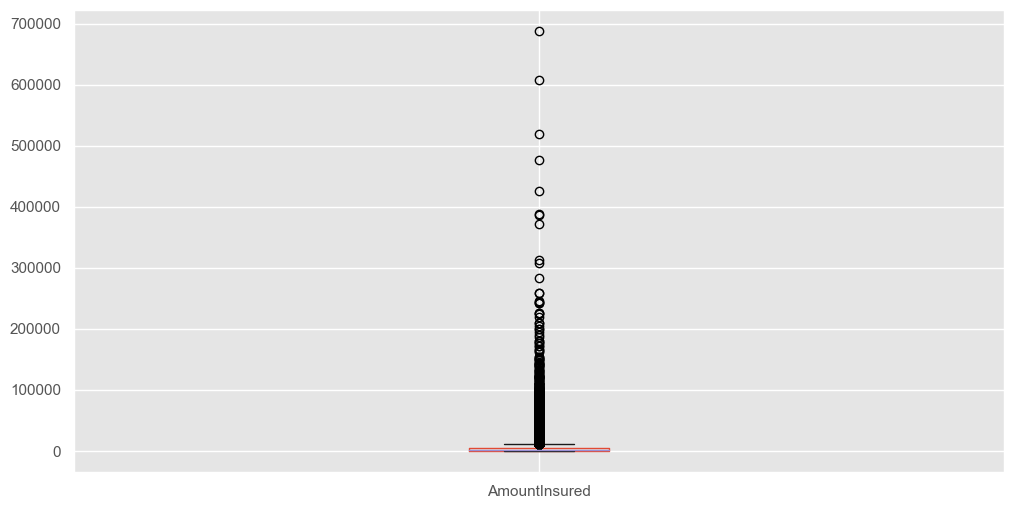

In [225]:
df2[['AmountInsured']].boxplot()

Distribution of the Amount Insured

Text(0.5, 1.0, 'Distribution of Amount Insured')

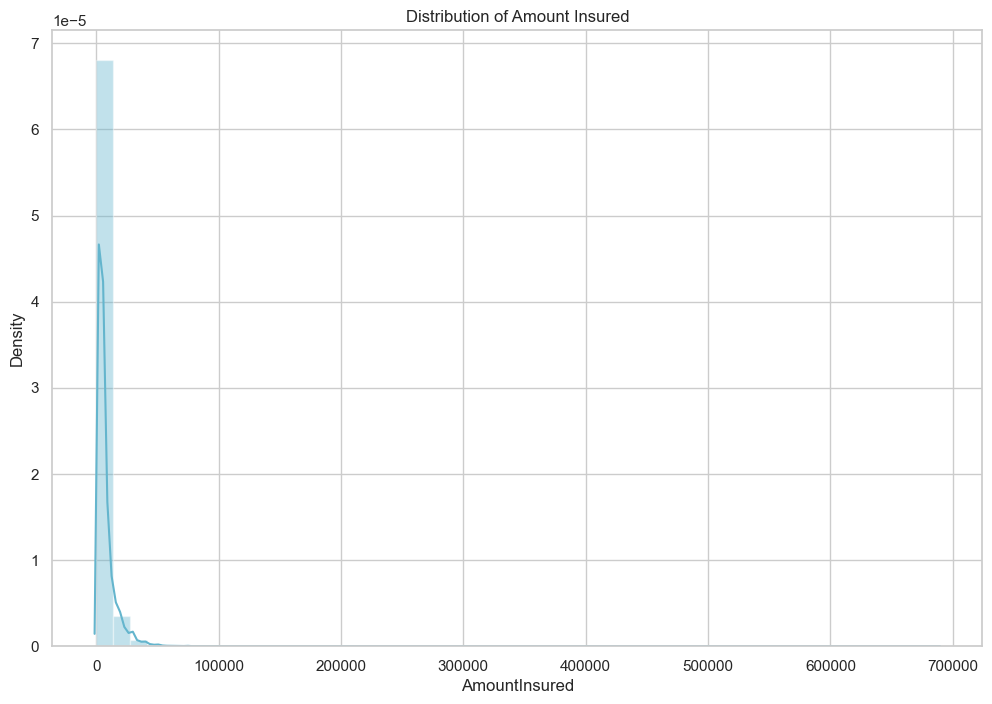

In [226]:
# First we'll see how the Amount Insured are distributed according to given factors
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df2['AmountInsured'], kde = True, color = 'c')
plt.title('Distribution of Amount Insured')

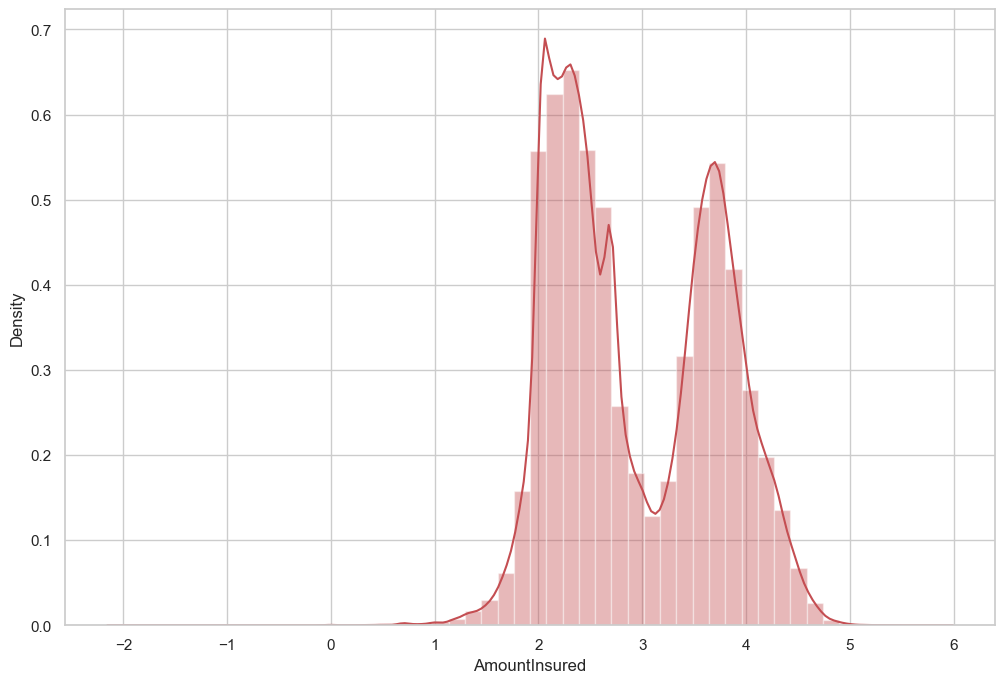

In [227]:
# This distribution is right-skewed. To make it closer to normal we can apply natural log
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df2['AmountInsured']), kde = True, color = 'r' )

**2. `PatientAge`**

<Axes: xlabel='PatientAge', ylabel='Count'>

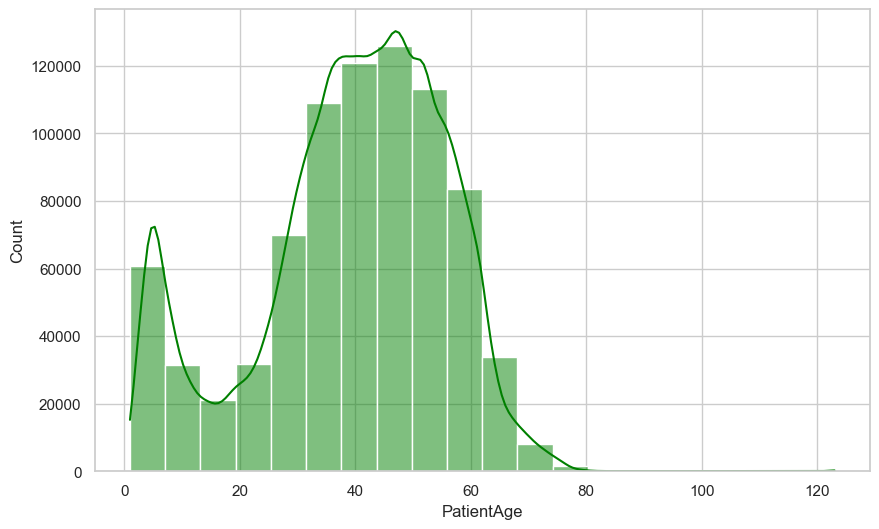

In [228]:
plt.figure(figsize=(10, 6))
sns.histplot(x='PatientAge', data=df2, bins=20, kde=True, color='green')

**3. `MCDays`**

<Axes: >

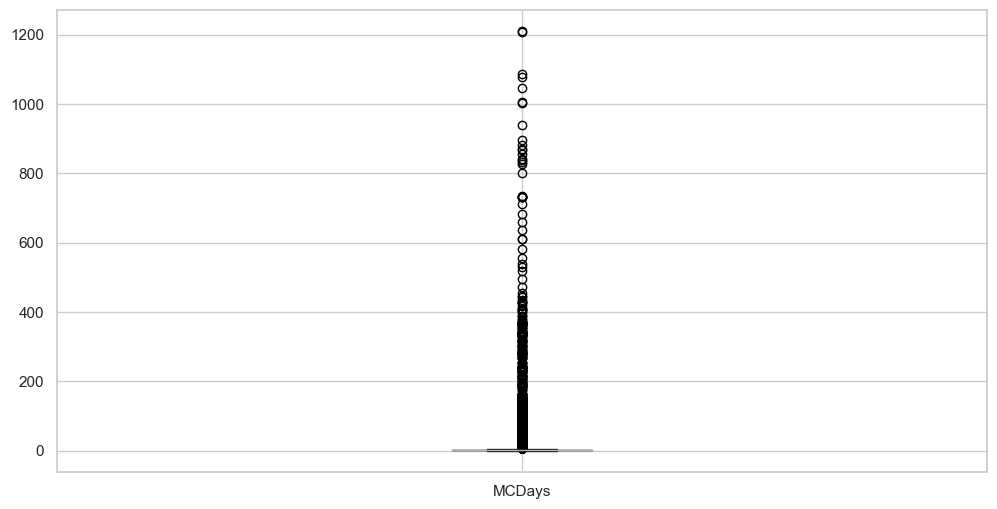

In [54]:
## MC Days
df2[['MCDays']].boxplot()
# df2.MCDays.value_counts().plot(kind="pie",
#                           title="MCDays")

##### Categorical Variables

In [229]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsLTM', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee    Parent       Spouse
IsLTM                                                        
0             3137.228503  3518.270979  2484.976  3598.577813
1             2961.967036  4973.943517  1209.575  4065.328873

In [230]:
# cross tab of Cut and Color
pd.crosstab(index=df2['IsPanel'], columns=df2['Relationship'])

Relationship   Child  Employee  Parent  Spouse
IsPanel                                       
0               9436    107190       8    8853
1             110019    488346       4   86955

<Axes: xlabel='IsPanel', ylabel='count'>

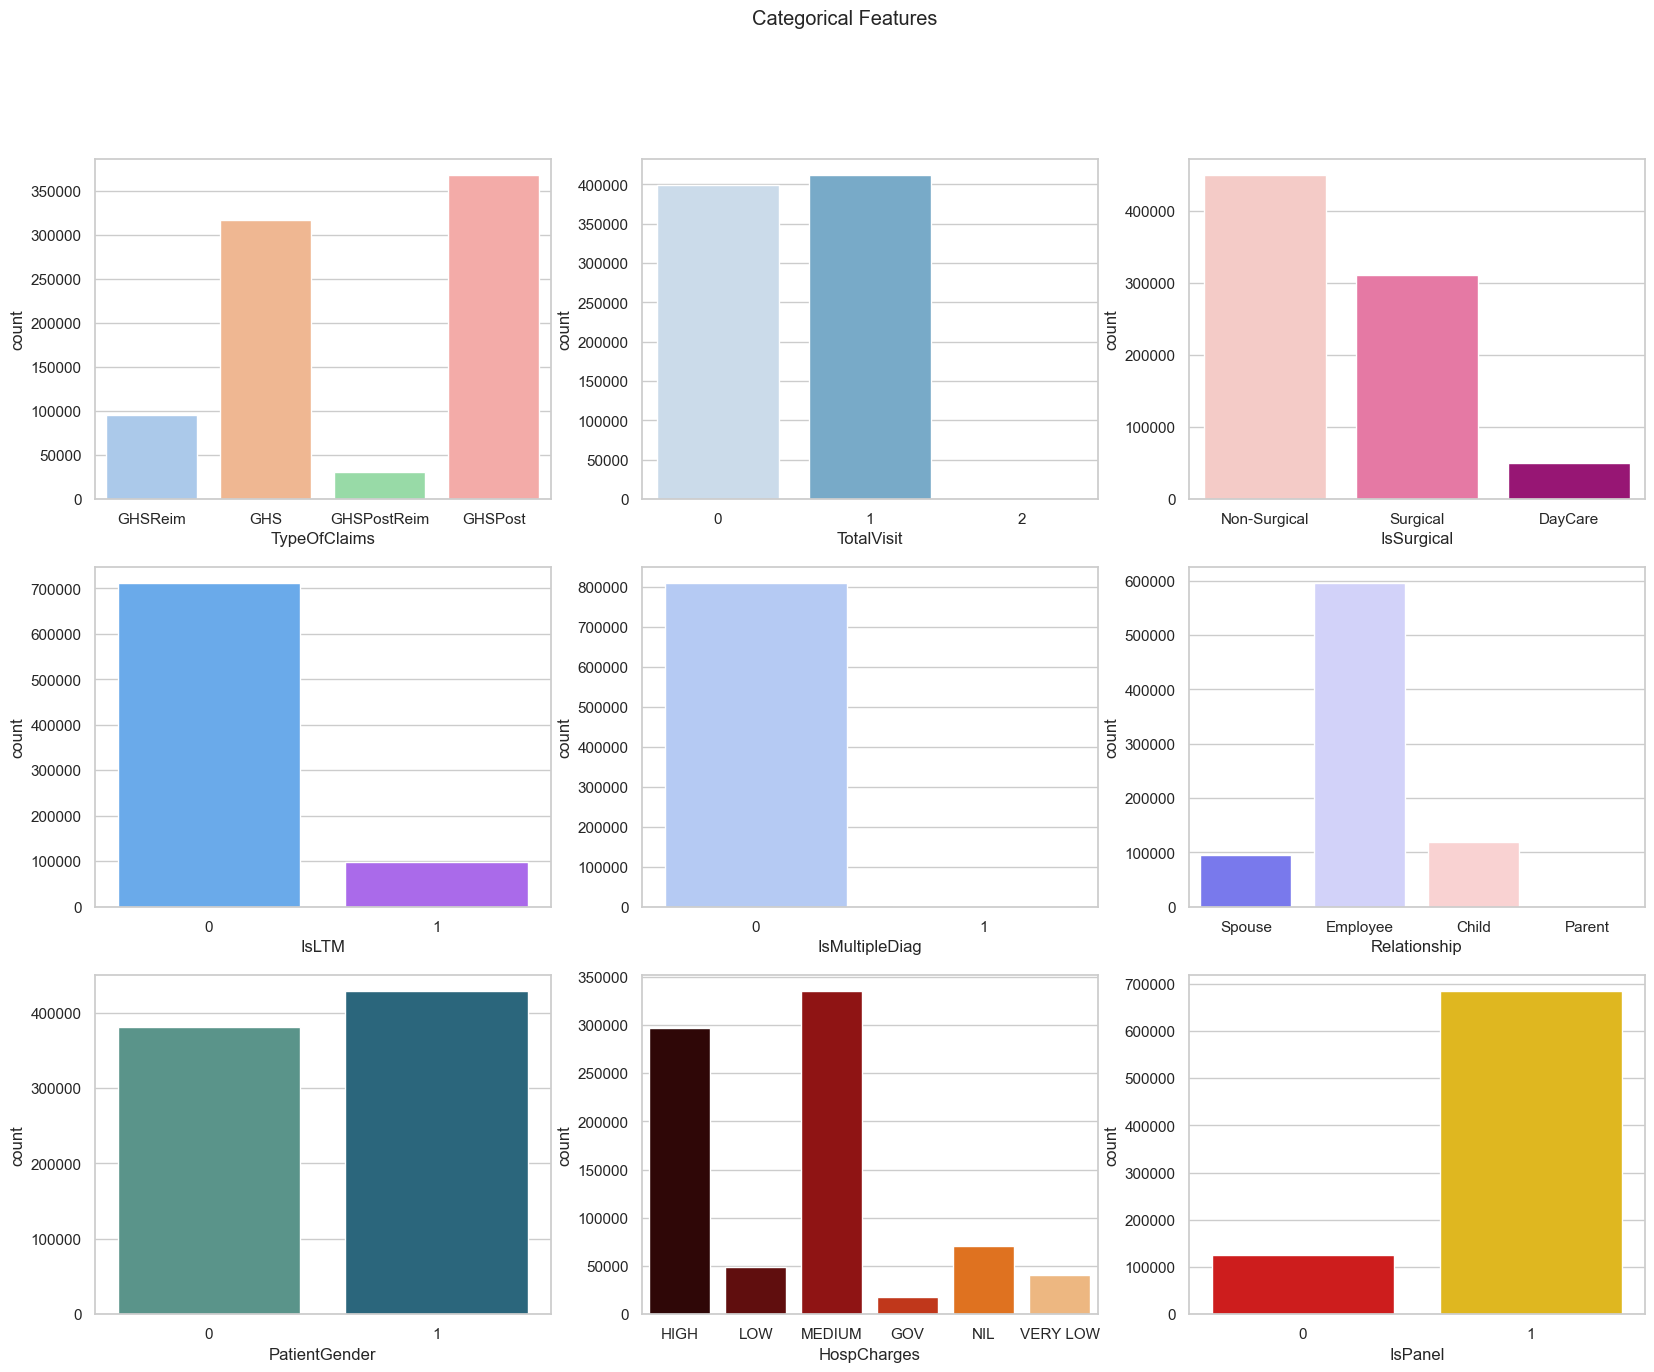

In [62]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Categorical Features')

sns.countplot(x='TypeOfClaims', data=df2, ax=axes[0,0], palette='pastel')
sns.countplot(x='TotalVisit', data=df2, ax=axes[0,1], palette='Blues')
sns.countplot(x='IsSurgical', data=df2, ax=axes[0,2], palette='RdPu')
sns.countplot(x='IsLTM', data=df2, ax=axes[1,0], palette='cool')
sns.countplot(x='IsMultipleDiag', data=df2, ax=axes[1,1], palette='coolwarm')
sns.countplot(x='Relationship', data=df2, ax=axes[1,2], palette='bwr')
sns.countplot(x='PatientGender', data=df2, ax=axes[2,0], palette='crest')
sns.countplot(x='HospCharges', data=df2, ax=axes[2,1], palette='gist_heat')
sns.countplot(x='IsPanel', data=df2, ax=axes[2,2], palette='hot')

<Axes: title={'center': 'Is Surgical'}, ylabel='IsSurgical'>

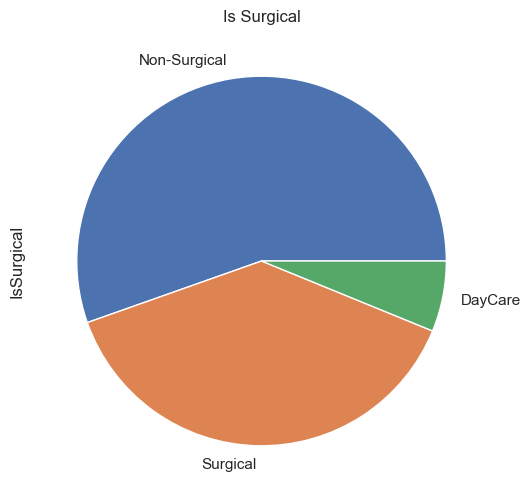

In [85]:
## IsSurgical
df2.IsSurgical.value_counts().plot(kind="pie",
                           title="Is Surgical")

<Axes: xlabel='TotalVisit', ylabel='Count'>

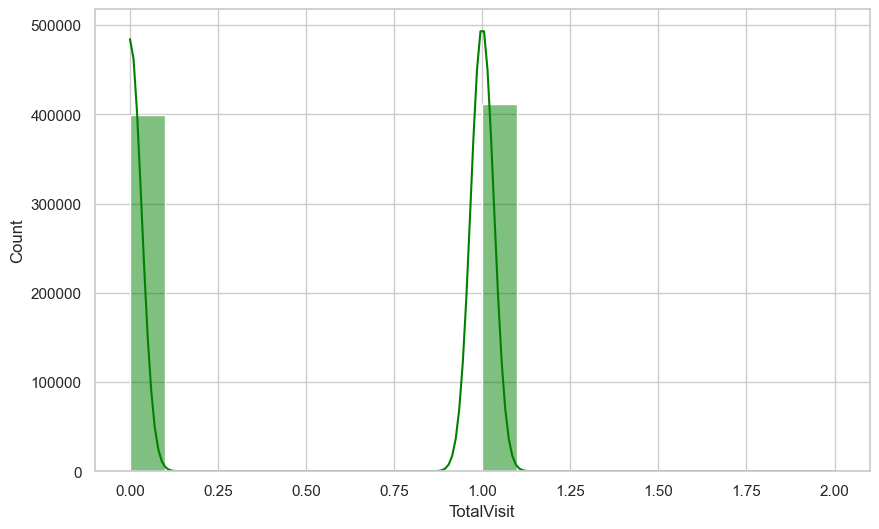

In [86]:
# Total Visit
plt.figure(figsize=(10, 6))
sns.histplot(x='TotalVisit', data=df2, bins=20, kde=True, color='green')

### Bivariate

In [63]:
# average carat weight and price by Cut
df2.groupby(by = 'Relationship').sum()

MCDays  AmountIncurred  AmountInsured    ExcessPaid  \
Relationship                                                              
Child         3.350406e+05    3.910851e+08   3.740968e+08  1.698829e+07   
Employee      1.490160e+06    2.344769e+09   2.209192e+09  1.355777e+08   
Parent        2.900000e+01    7.557468e+04   2.726891e+04  4.830577e+04   
Spouse        2.333082e+05    3.783225e+08   3.527373e+08  2.558523e+07   

              TotalVisit  IsLTM  IsMultipleDiag  PatientAge  IsPanel  
Relationship                                                          
Child              68131   3455              59     1296249   110008  
Employee          301604  78326             635    26118387   488302  
Parent                11      2               0         827        4  
Spouse             41613  17267              51     4452977    86913

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

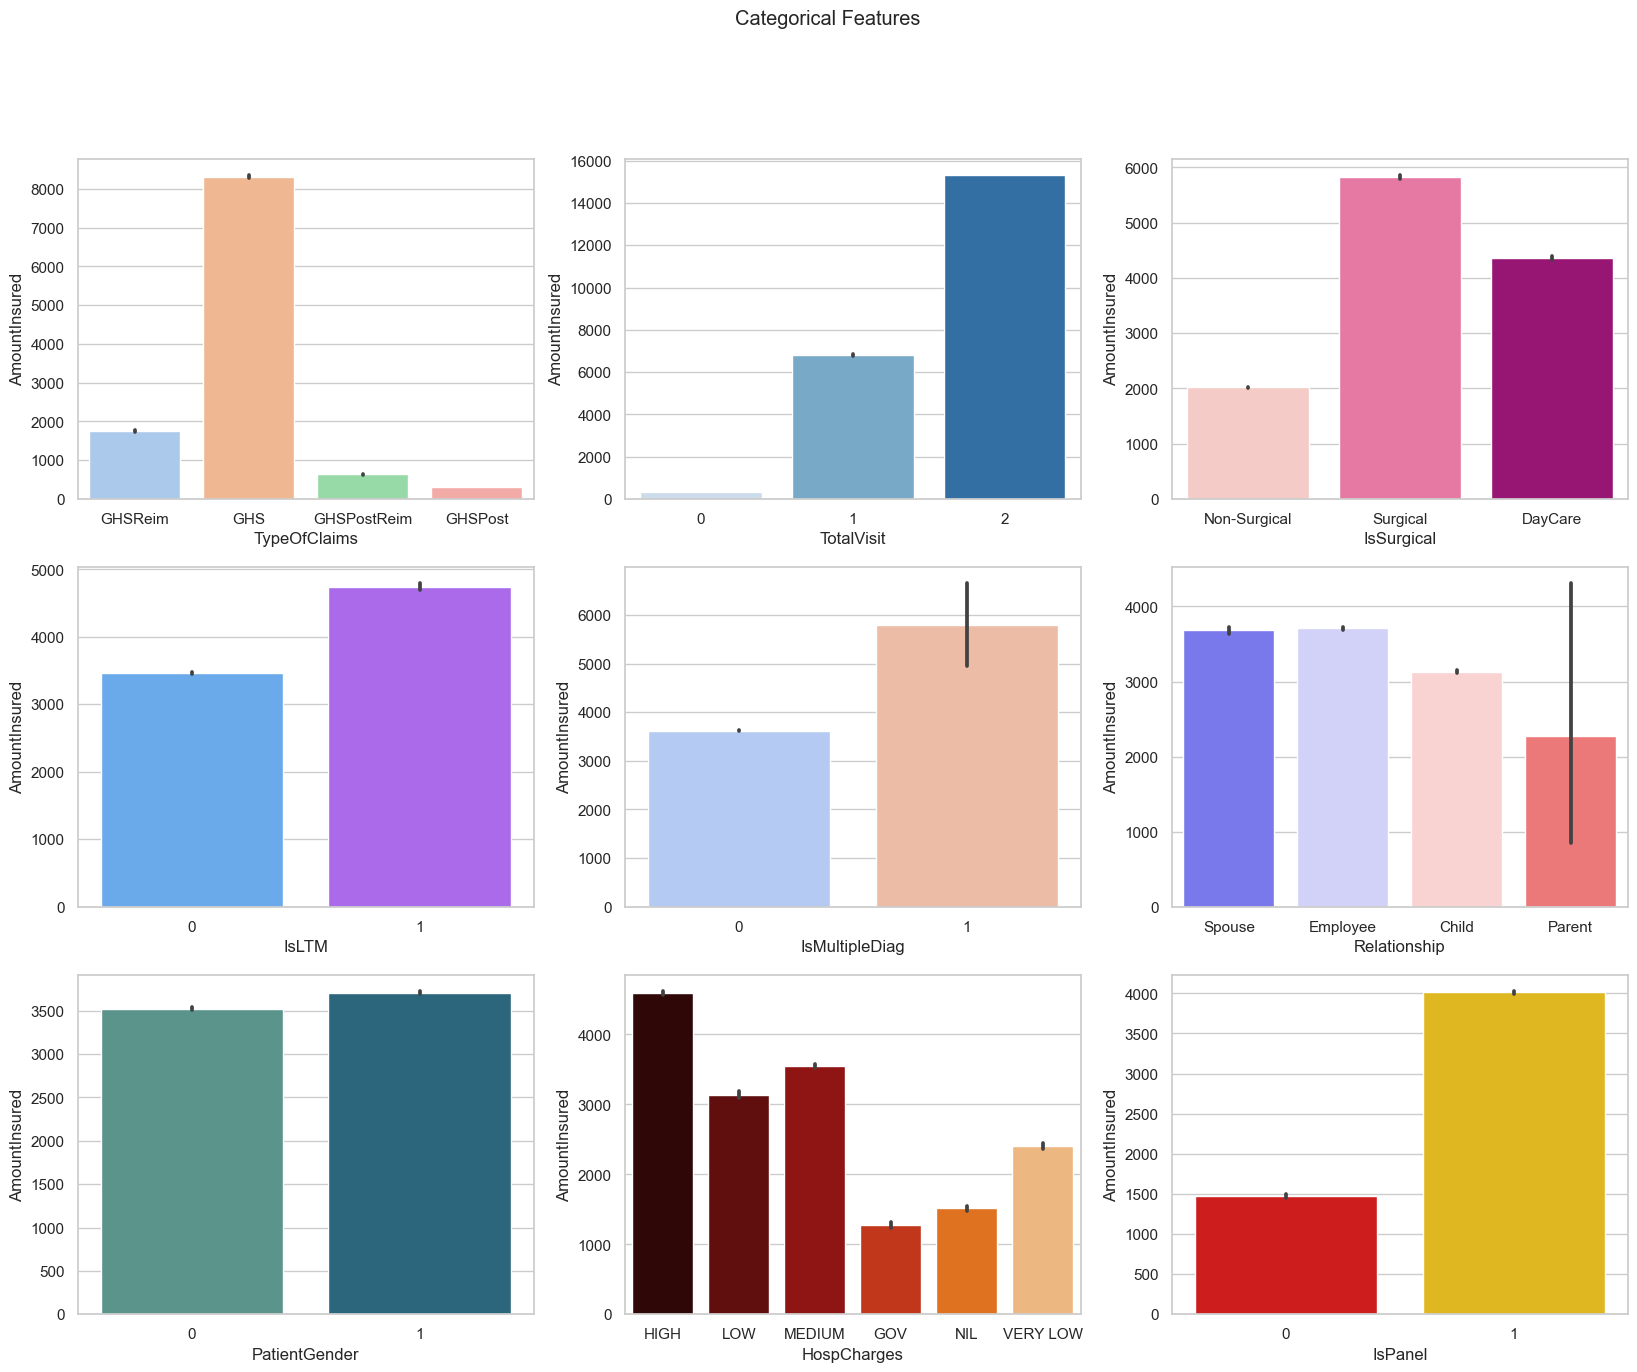

In [64]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Categorical Features')

sns.barplot(x='TypeOfClaims', y='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.barplot(x='TotalVisit', y='AmountInsured', data=df2, ax=axes[0,1], palette='Blues')
sns.barplot(x='IsSurgical', y='AmountInsured', data=df2, ax=axes[0,2], palette='RdPu')
sns.barplot(x='IsLTM', y='AmountInsured', data=df2, ax=axes[1,0], palette='cool')
sns.barplot(x='IsMultipleDiag', y='AmountInsured', data=df2, ax=axes[1,1], palette='coolwarm')
sns.barplot(x='Relationship', y='AmountInsured', data=df2, ax=axes[1,2], palette='bwr')
sns.barplot(x='PatientGender', y='AmountInsured', data=df2, ax=axes[2,0], palette='crest')
sns.barplot(x='HospCharges', y='AmountInsured', data=df2, ax=axes[2,1], palette='gist_heat')
sns.barplot(x='IsPanel', y='AmountInsured', data=df2, ax=axes[2,2], palette='hot')

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

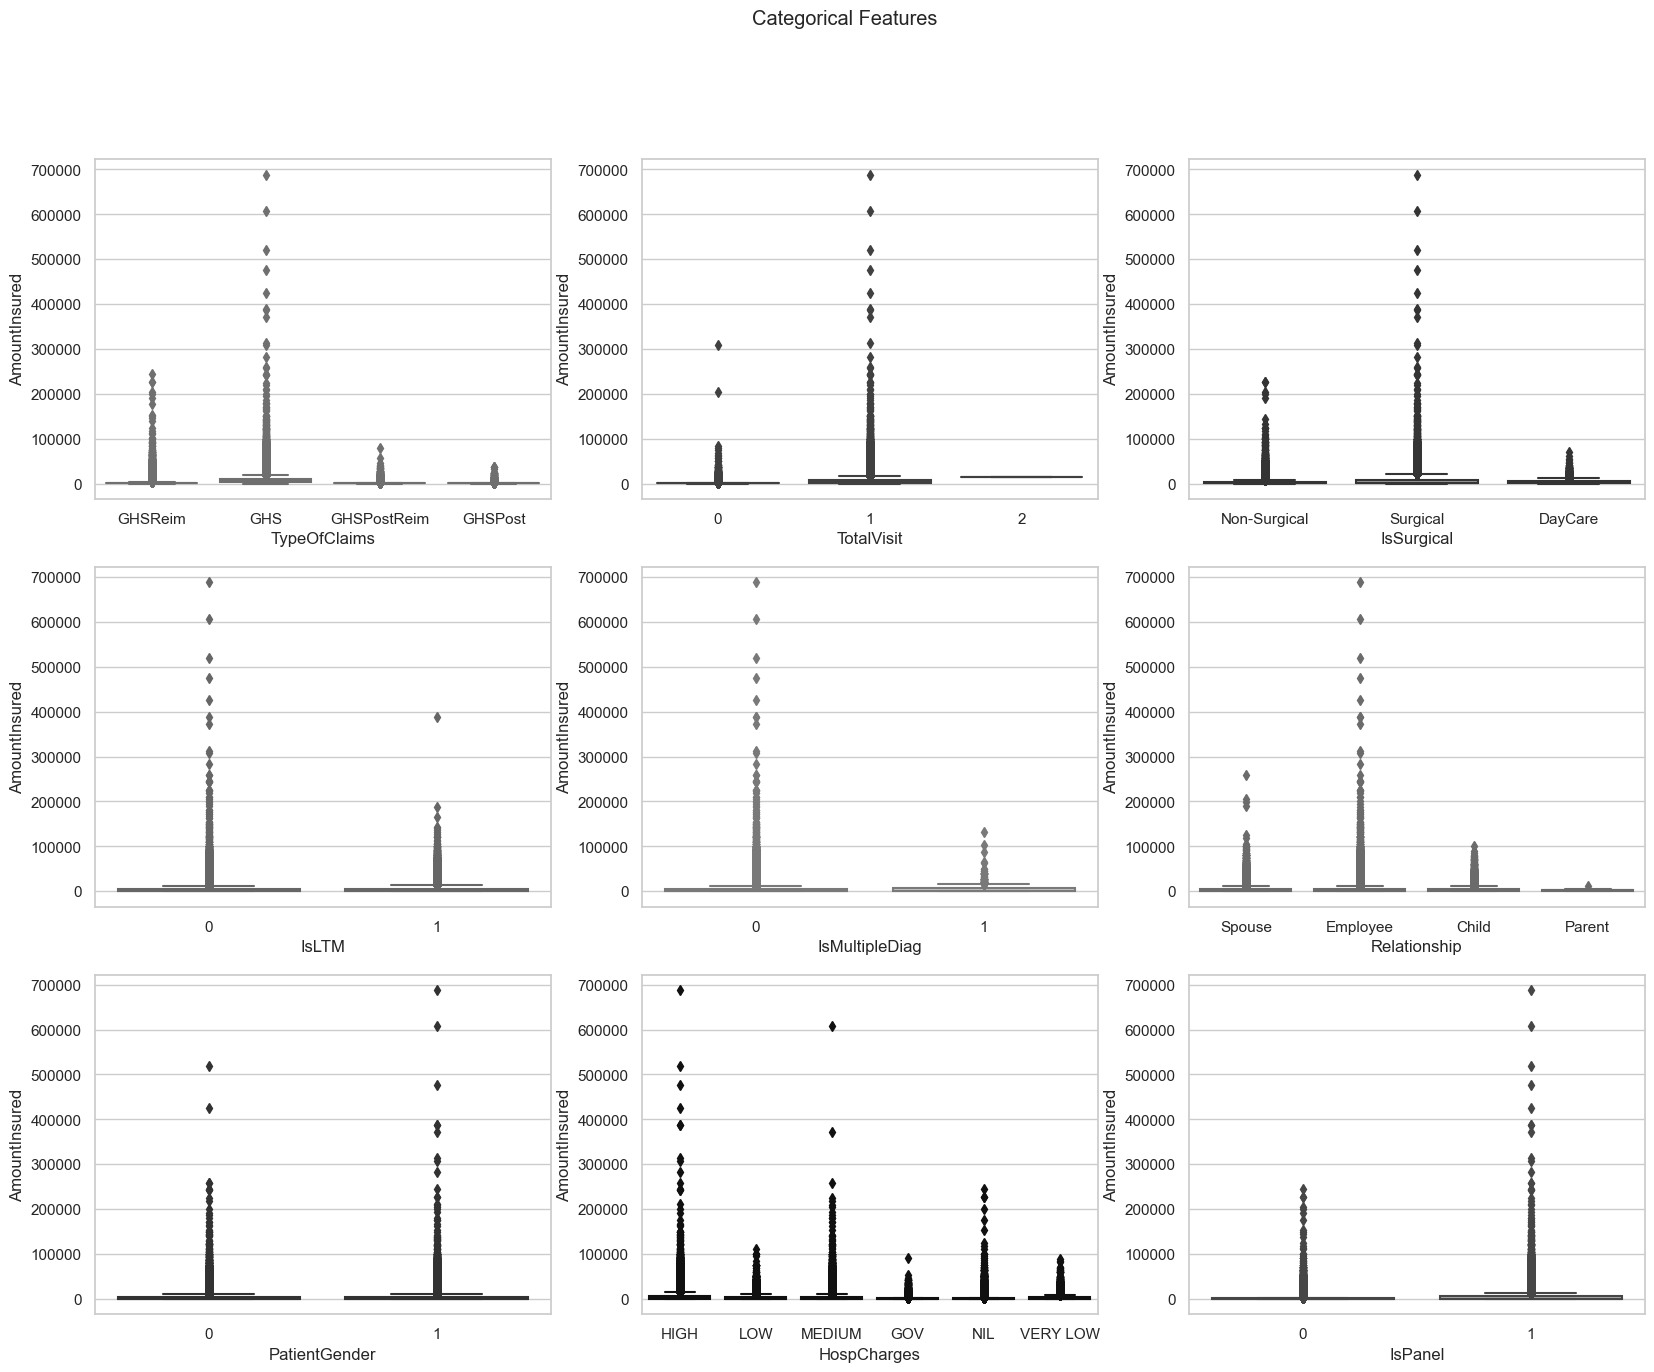

In [65]:
# plot boxplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Categorical Features')

sns.boxplot(x='TypeOfClaims', y='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.boxplot(x='TotalVisit', y='AmountInsured', data=df2, ax=axes[0,1], palette='Blues')
sns.boxplot(x='IsSurgical', y='AmountInsured', data=df2, ax=axes[0,2], palette='RdPu')
sns.boxplot(x='IsLTM', y='AmountInsured', data=df2, ax=axes[1,0], palette='cool')
sns.boxplot(x='IsMultipleDiag', y='AmountInsured', data=df2, ax=axes[1,1], palette='coolwarm')
sns.boxplot(x='Relationship', y='AmountInsured', data=df2, ax=axes[1,2], palette='bwr')
sns.boxplot(x='PatientGender', y='AmountInsured', data=df2, ax=axes[2,0], palette='crest')
sns.boxplot(x='HospCharges', y='AmountInsured', data=df2, ax=axes[2,1], palette='gist_heat')
sns.boxplot(x='IsPanel', y='AmountInsured', data=df2, ax=axes[2,2], palette='hot')

<Axes: xlabel='TypeOfClaims', ylabel='AmountInsured'>

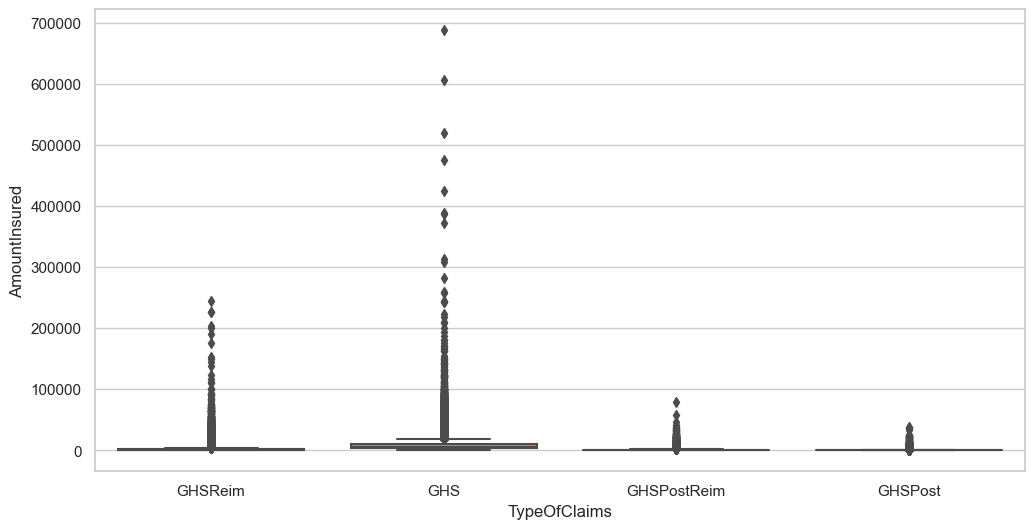

In [89]:
sns.boxplot(data=df2, x='TypeOfClaims', y='AmountInsured')

<Axes: xlabel='IsSurgical', ylabel='AmountInsured'>

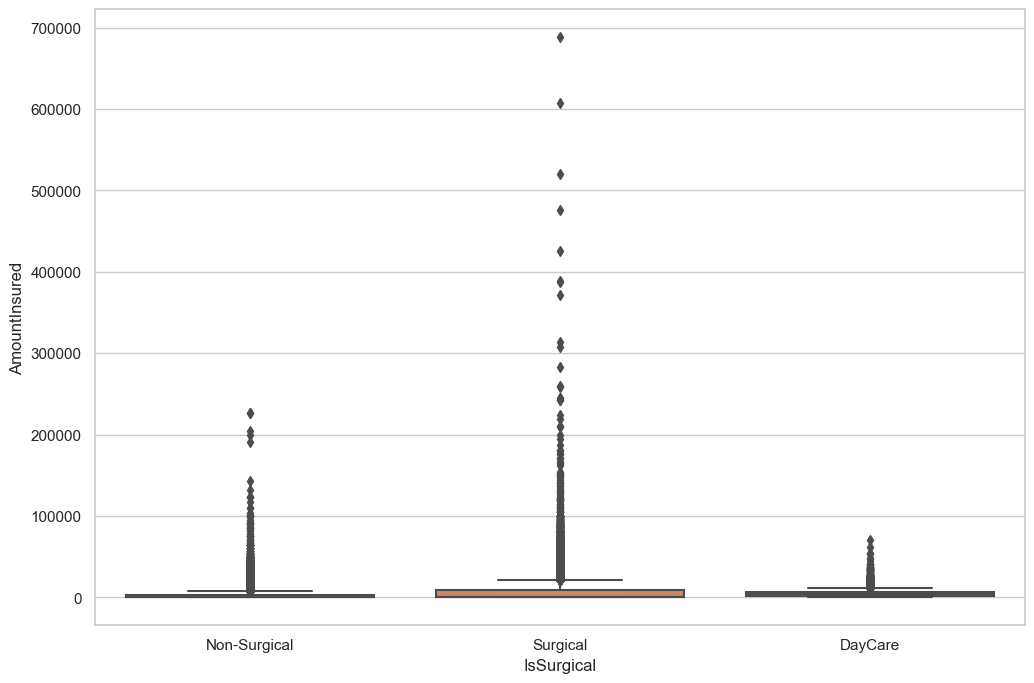

In [106]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='IsSurgical', y='AmountInsured')

<Axes: xlabel='IsLTM', ylabel='AmountInsured'>

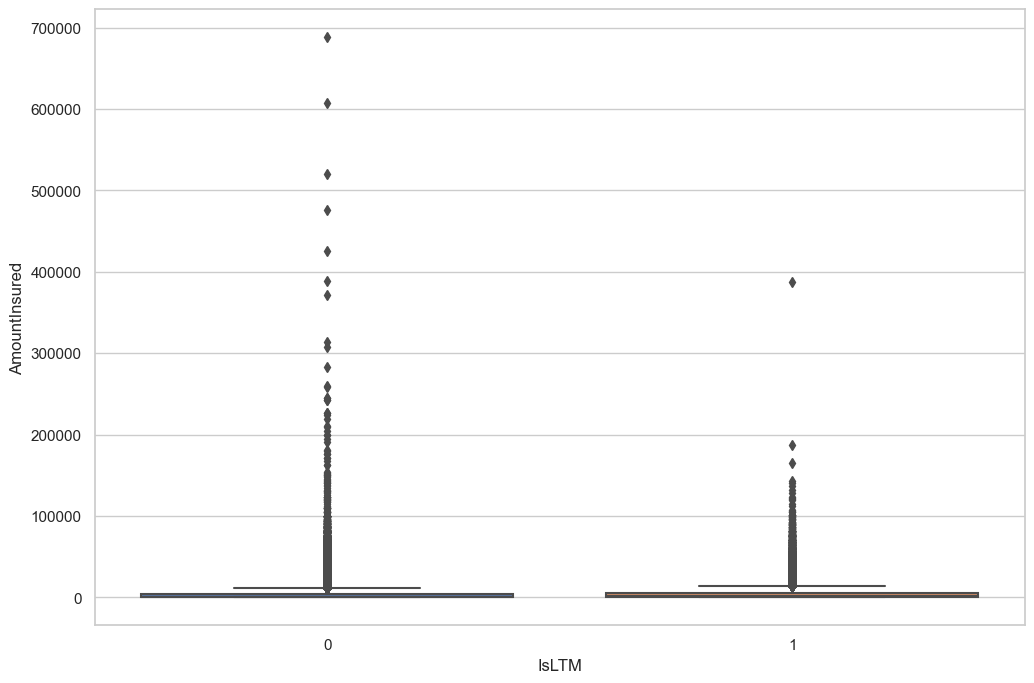

In [91]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='IsLTM', y='AmountInsured')

<Axes: xlabel='IsMultipleDiag', ylabel='AmountInsured'>

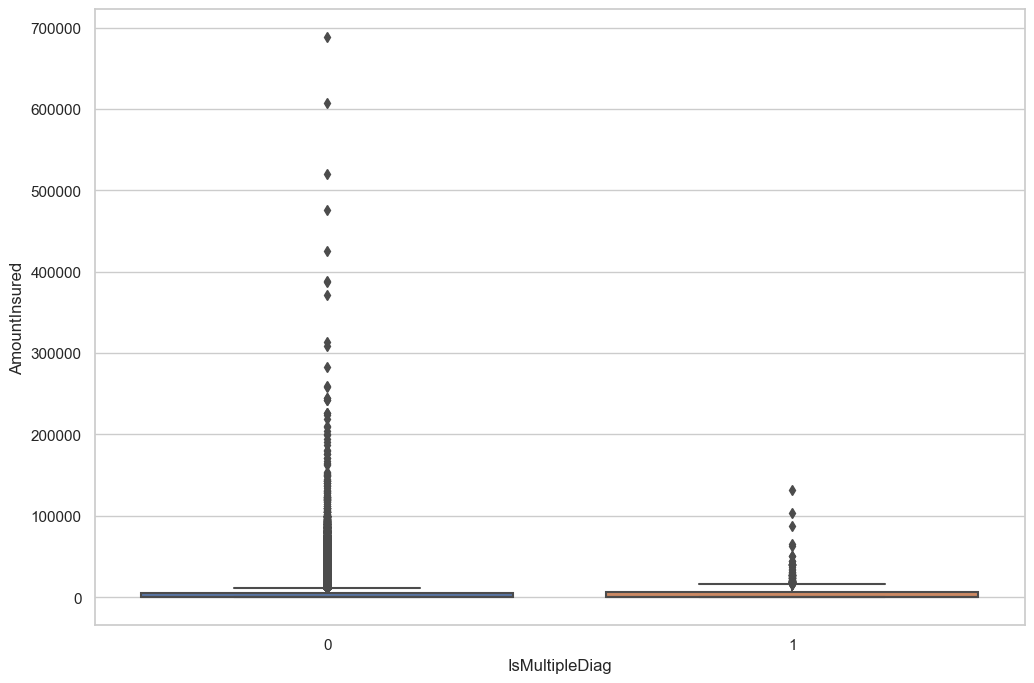

In [107]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='IsMultipleDiag', y='AmountInsured')

<Axes: xlabel='Relationship', ylabel='AmountInsured'>

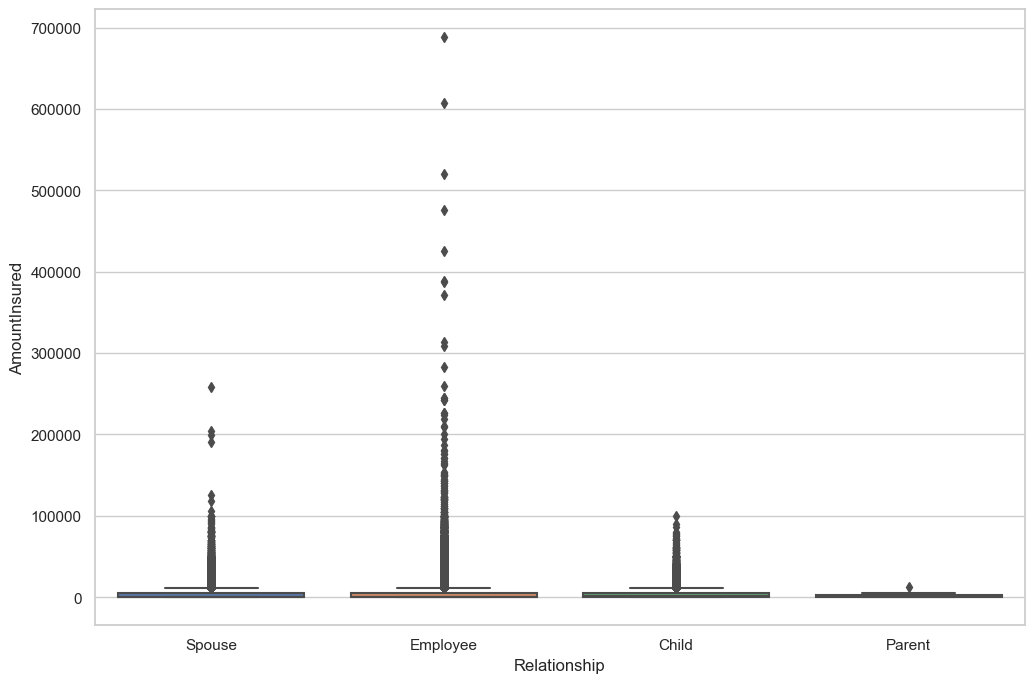

In [108]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='Relationship', y='AmountInsured')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

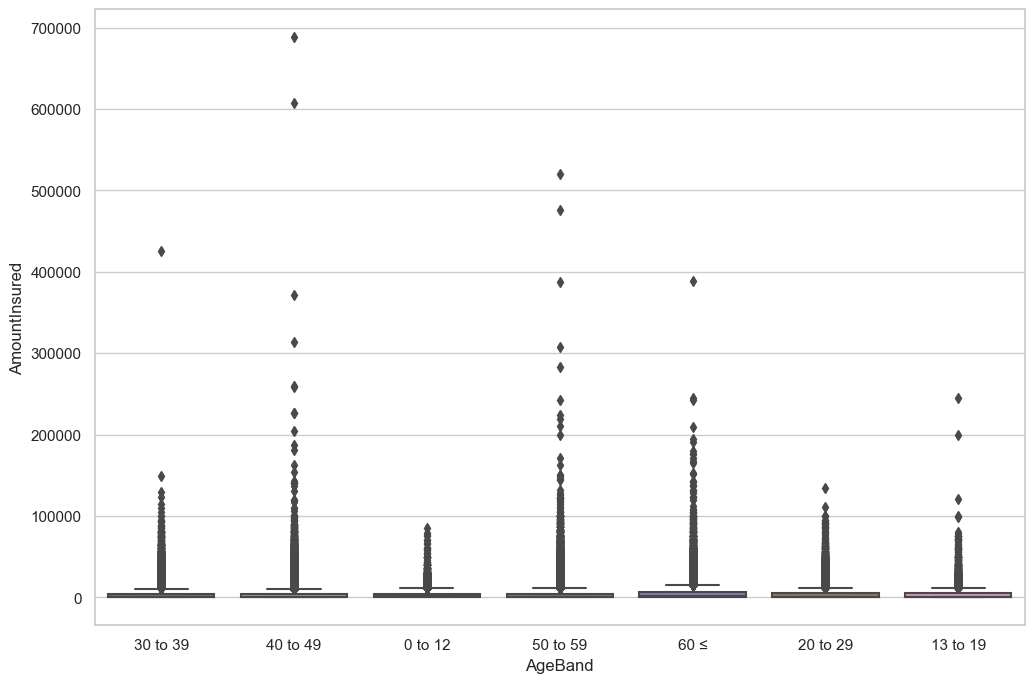

In [109]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='AgeBand', y='AmountInsured')

<Axes: xlabel='PatientGender', ylabel='AmountInsured'>

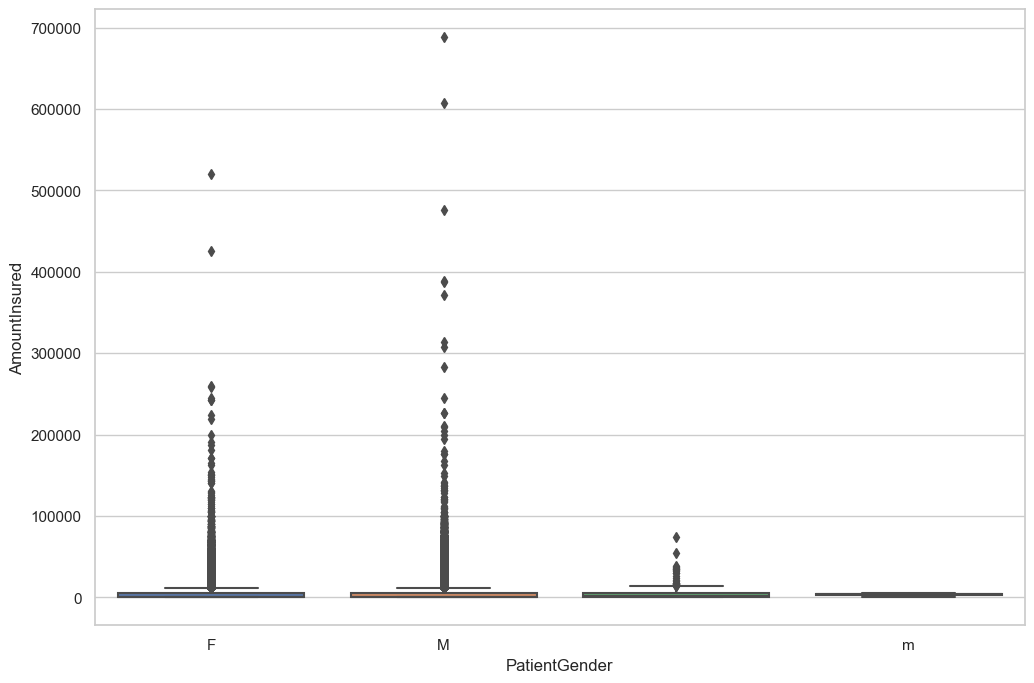

In [110]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='PatientGender', y='AmountInsured')

<Axes: xlabel='HospCharges', ylabel='AmountInsured'>

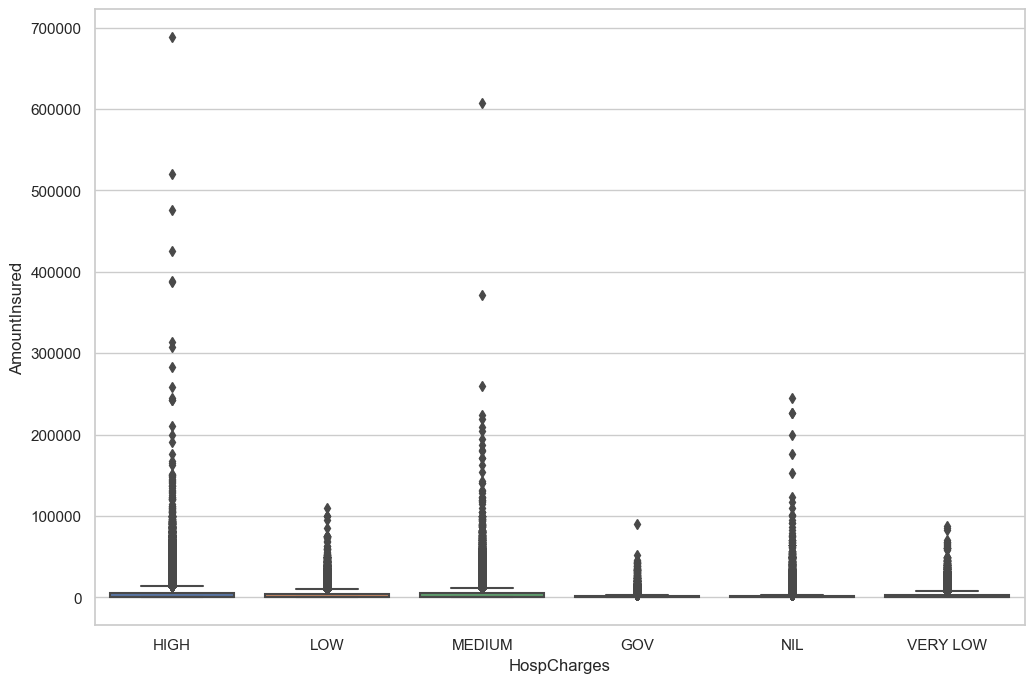

In [111]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='HospCharges', y='AmountInsured')

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

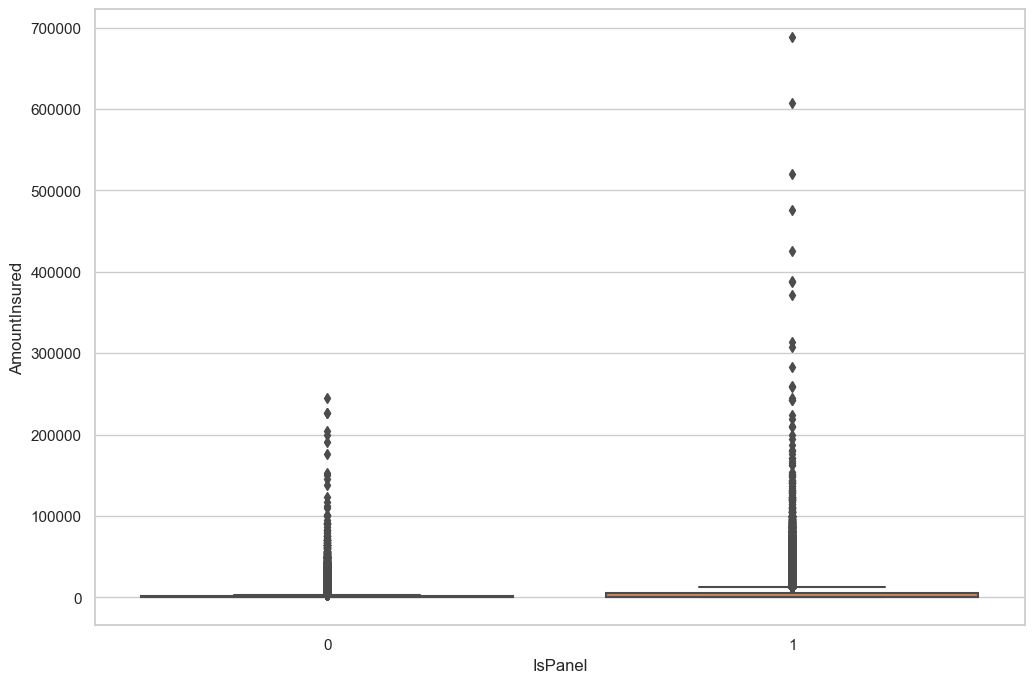

In [112]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='IsPanel', y='AmountInsured')

In [113]:
## Top 10 Medical Providers
#df2.groupby('MedicalProviders')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='MedicalProviders', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
MedicalProviders                                               
SUNWAY MEDICAL CENTRE                              1.668741e+08
SUBANG JAYA MEDICAL CENTRE                         1.089985e+08
KPJ PUSAT PAKAR MATA CENTRE FOR SIGHT (DAY CARE)   9.128819e+07
OTHERS                                             8.215402e+07
PANTAI HOSPITAL KUALA LUMPUR                       7.324319e+07
THOMSON HOSPITAL KOTA DAMANSARA                    6.600755e+07
GLENEAGLES KUALA LUMPUR                            6.282341e+07
PANTAI HOSPITAL PENANG                             5.768934e+07
KPJ SELANGOR SPECIALIST HOSPITAL                   5.495196e+07
AVISENA SPECIALIST HOSPITAL                        5.105953e+07

In [114]:
## Top 10 Provider State
#df2.groupby('ProviderState')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='ProviderState', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
ProviderState                 
SELANGOR          1.077520e+09
KUALA LUMPUR      5.133955e+08
PULAU PINANG      3.367020e+08
JOHOR             2.445364e+08
NEGERI SEMBILAN   1.608735e+08
PERAK             1.347810e+08
KEDAH             1.060484e+08
MELAKA            1.041681e+08
OTHER             8.274711e+07
SARAWAK           6.219784e+07

In [115]:
## Top 10 Industry Field
#df2.groupby('IndustryField')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
IndustryField                               
Insurance                       5.676124e+08
Financial Services              2.842362e+08
Aviation/Airline                1.322645e+08
Manufacturing Factory/Company   1.040030e+08
Education                       7.712971e+07
Transport Services              6.435854e+07
Electronic                      6.368745e+07
Semi-Conductor                  6.082832e+07
Goverment Department            6.013261e+07
Manufacturing - Food Product    5.865912e+07

In [116]:
## Top 10 Diagnosis Group
#df2.groupby('DiagnosisGroup')['AmountInsured'].sum().nlargest(10)


# create pivot table = Change to %
pd.pivot_table(df2, values='AmountInsured', index='DiagnosisGroup', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
DiagnosisGroup                                                   
Diseases of the digestive system                     3.989565e+08
Injury, poisoning and certain other consequence...   3.695664e+08
Diseases of the musculoskeletal system and conn...   3.532471e+08
Diseases of the respiratory system                   3.512452e+08
Diseases of the circulatory system                   2.891011e+08
Diseases of the genitourinary system                 2.825431e+08
Neoplasms                                            2.168588e+08
Certain infectious and parasitic diseases            1.988750e+08
Diseases of the skin and subcutaneous tissue         9.754703e+07
Diseases of the eye and adnexa                       9.208208e+07

In [117]:
## Top 10 Industry Field
#df2.groupby('IndustryField')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
IndustryField                               
Insurance                       5.676124e+08
Financial Services              2.842362e+08
Aviation/Airline                1.322645e+08
Manufacturing Factory/Company   1.040030e+08
Education                       7.712971e+07
Transport Services              6.435854e+07
Electronic                      6.368745e+07
Semi-Conductor                  6.082832e+07
Goverment Department            6.013261e+07
Manufacturing - Food Product    5.865912e+07

In [118]:
# Top 10 Diagnosis
df2.groupby('Diagnosis')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='Diagnosis', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
Diagnosis                                                        
GASTRITIS, UNSPECIFIED                                87197345.61
CORONARY ARTERY DISEASE                               76612942.22
Acute sinusitis                                       68093387.75
Acute appendicitis                                    65689970.37
OTHERS                                                57835714.29
Tear of meniscus, current                             49402222.09
Dengue fever [classical dengue]                       48169521.65
Unspecified thoracic, thoracolumbar and lumbosa...    46574714.61
Other intervertebral disc disorders                   45088165.63
UTERINE FIBROIDS                                      44121297.39

In [119]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='AgeBand', aggfunc=np.mean).sort_values(by='AgeBand', ascending=True).head(10)

AmountInsured
AgeBand                
0 to 12     2964.786986
13 to 19    3529.096876
20 to 29    3695.962699
30 to 39    3442.160085
40 to 49    3522.023593
50 to 59    3732.954222
60 ≤        4945.296461

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

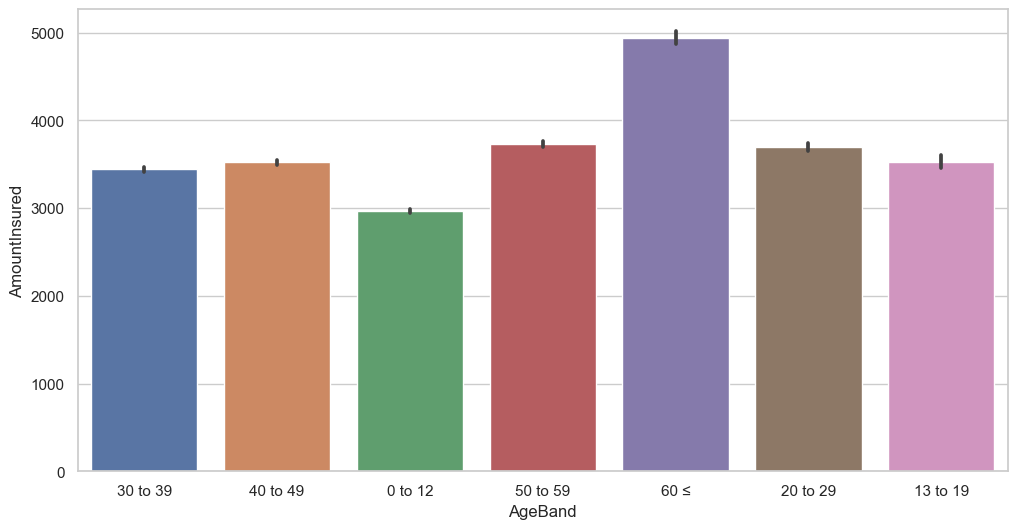

In [120]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured')

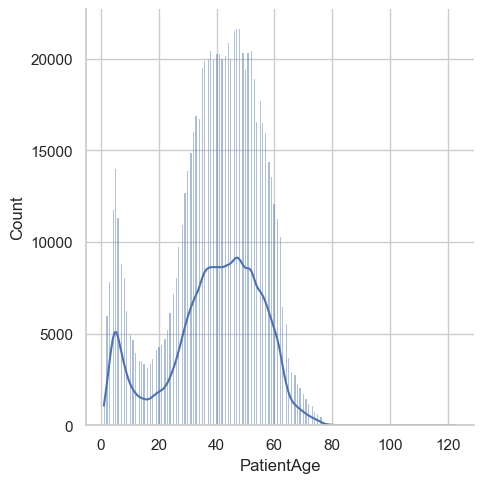

In [121]:
sns.displot(data=df2, x='PatientAge', kde=True)

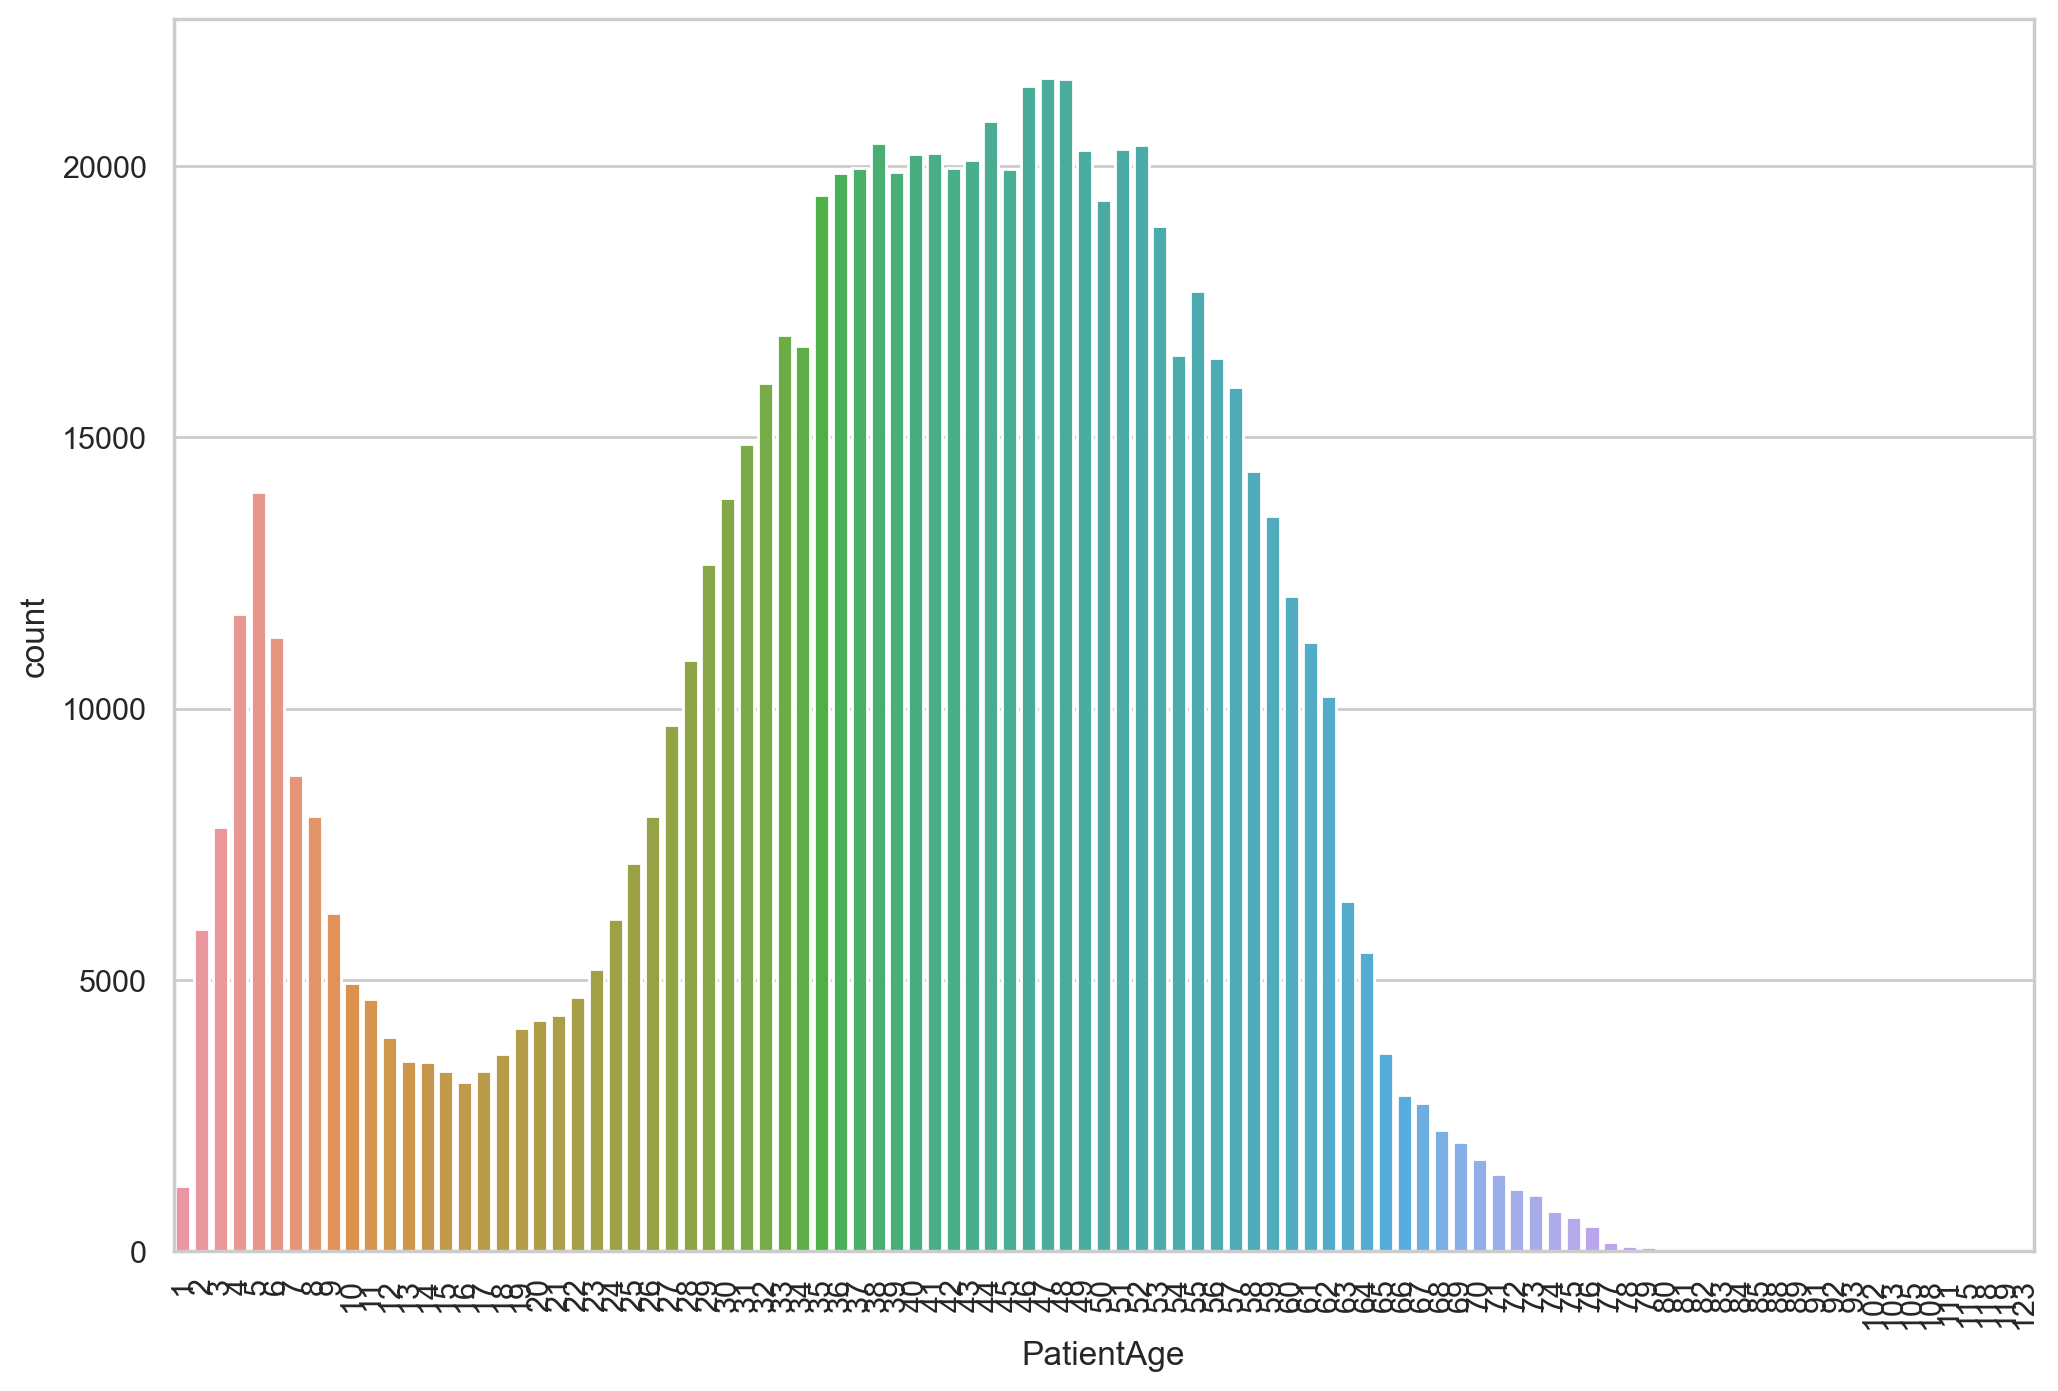

In [124]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df2, x='PatientAge');

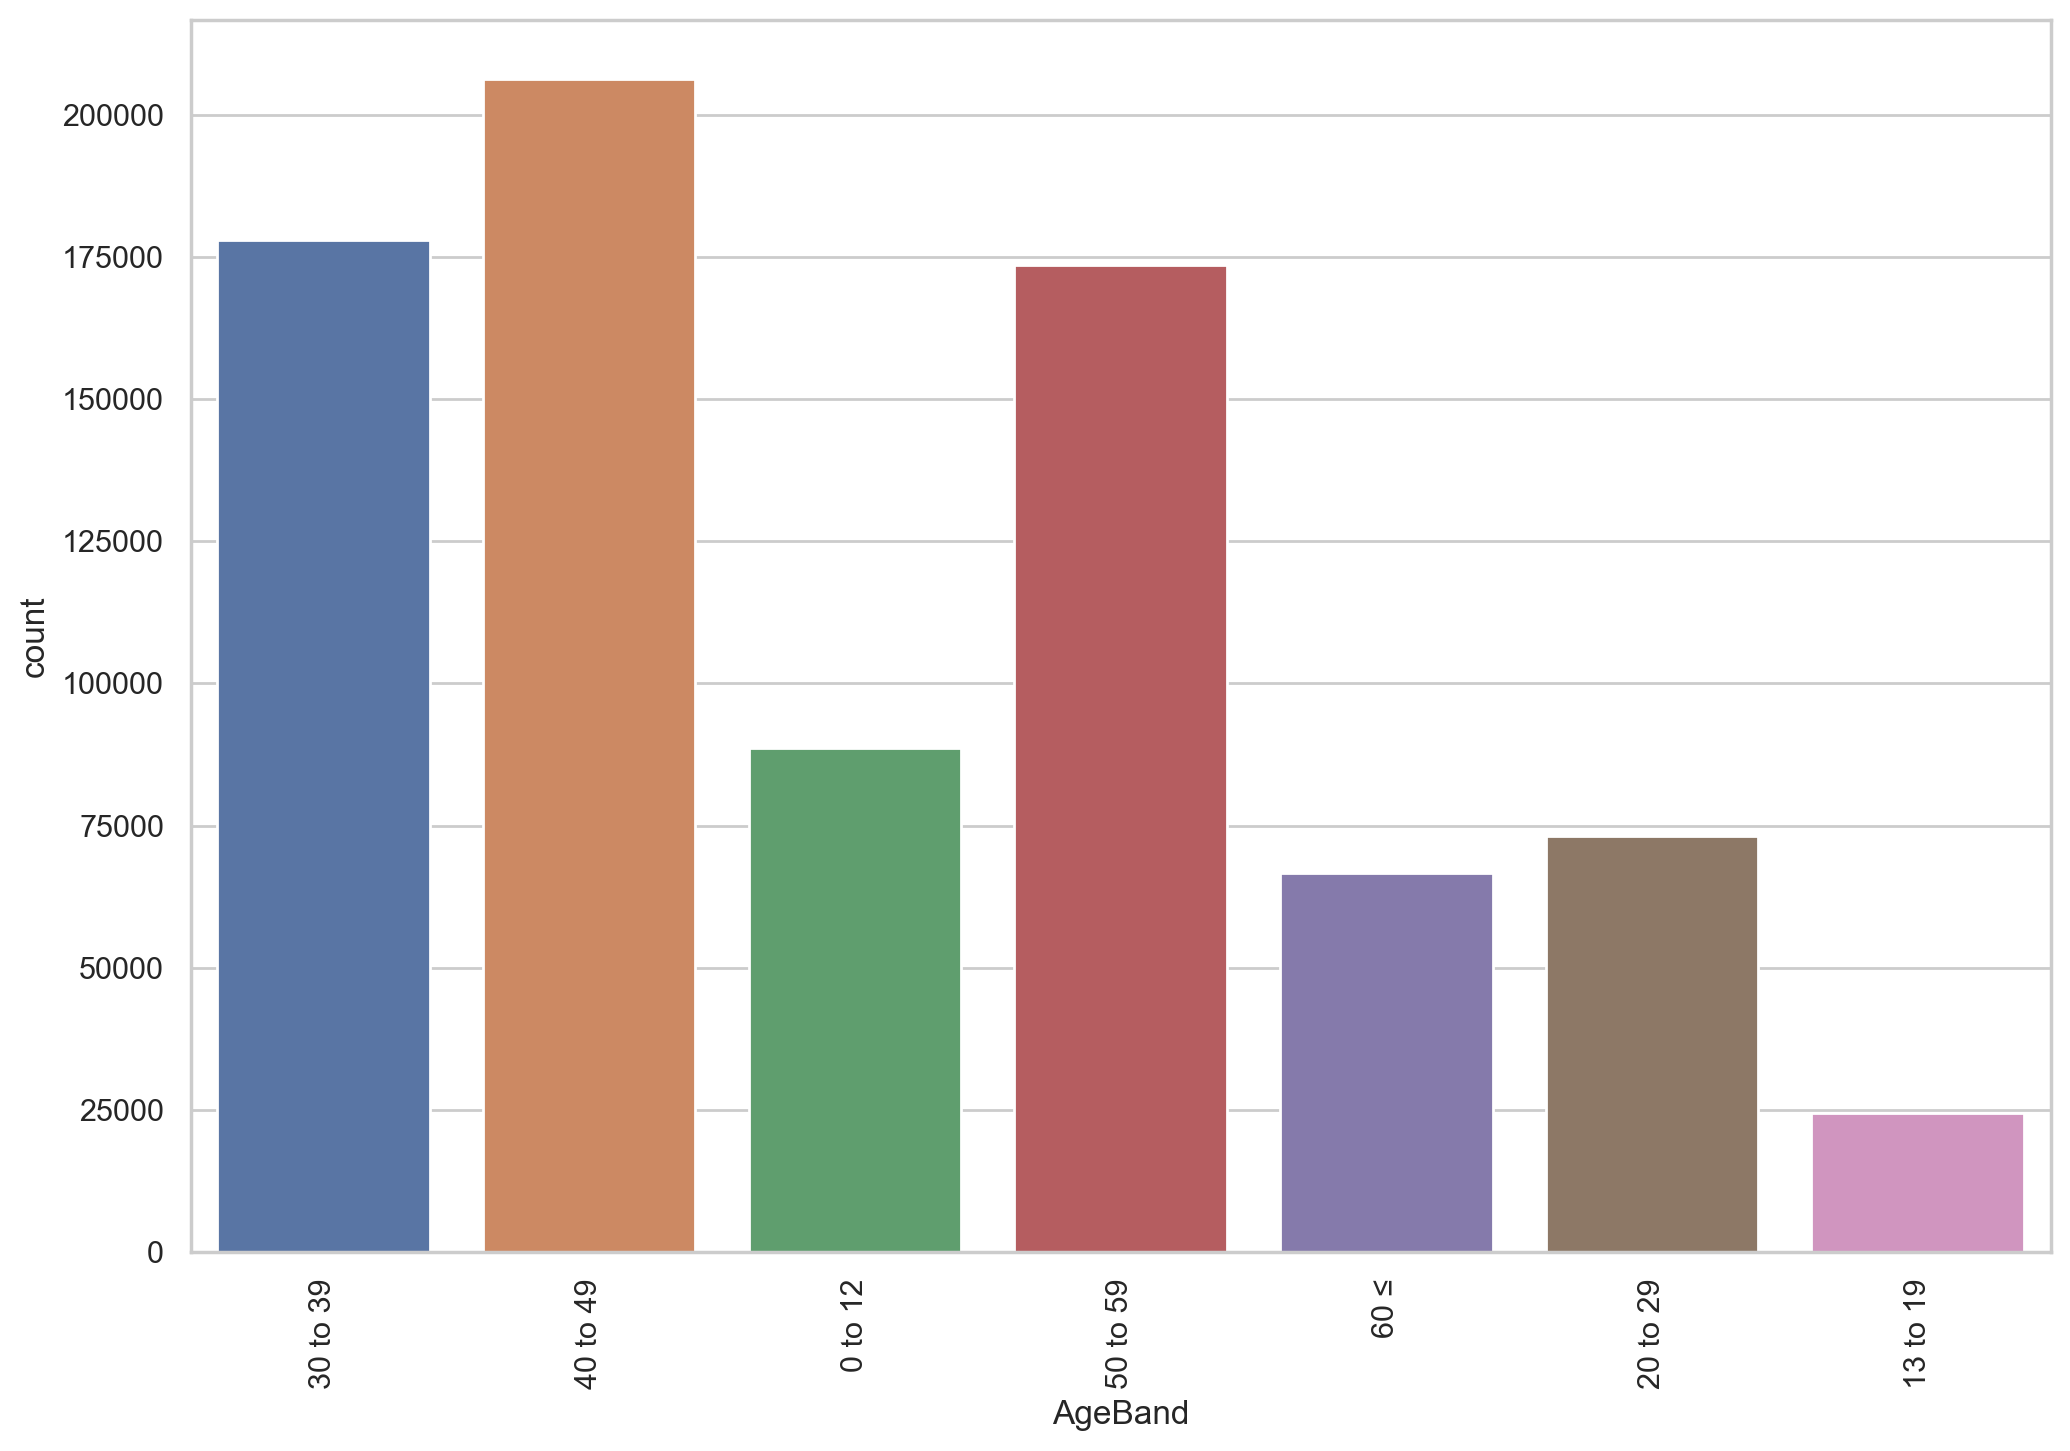

In [125]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df2, x='AgeBand');

#### Mutivariate

In [126]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsSurgical', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee       Parent       Spouse
IsSurgical                                                      
DayCare       3848.100297  4357.944495  2000.000000  4570.426300
Non-Surgical  2638.839328  1841.118324  2951.742857  2036.079989
Surgical      4571.777120  6024.948300  1151.677500  5449.474551

In [127]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsLTM', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee    Parent       Spouse
IsLTM                                                        
0             3137.427720  3518.490360  2484.976  3599.532769
1             2961.967036  4973.915325  1209.575  4065.718146

In [128]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='HospCharges', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee   Parent       Spouse
HospCharges                                                 
GOV            935.290425  1347.930124   306.50  1379.605851
HIGH          3527.199187  4906.715814  6328.40  4204.359619
LOW           2610.535446  3274.572652      NaN  3096.884044
MEDIUM        3200.495682  3616.349394   532.00  3615.590643
NIL           1666.383118  1471.211241  2106.56  2359.850817
VERY LOW      2057.296799  2488.182970  1473.05  2253.721904

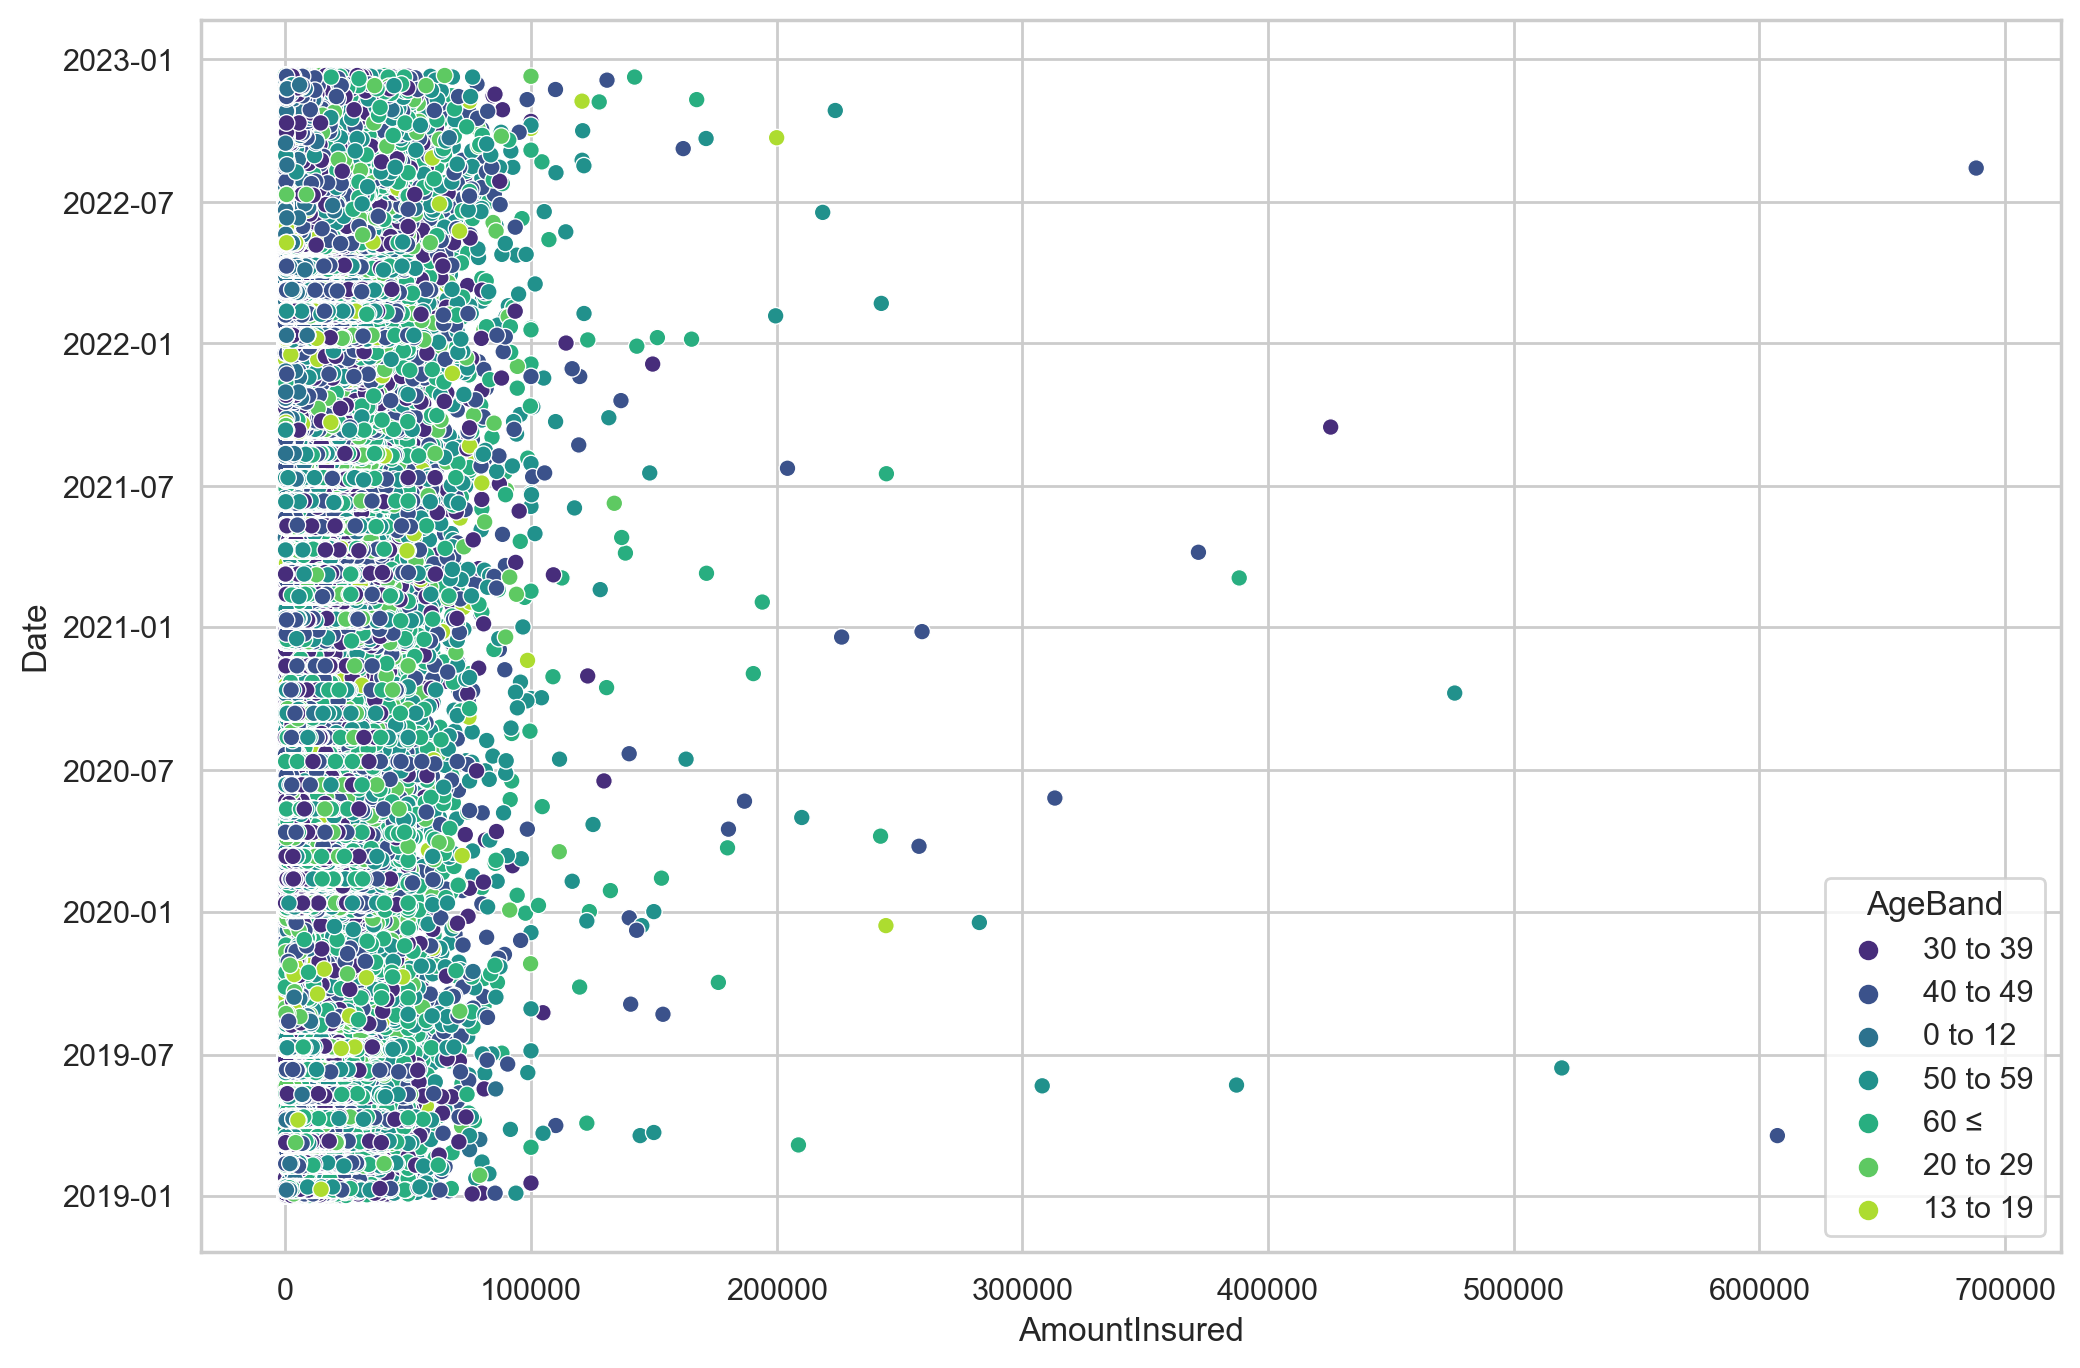

In [129]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='AmountInsured', y='Date', hue='AgeBand', palette='viridis');

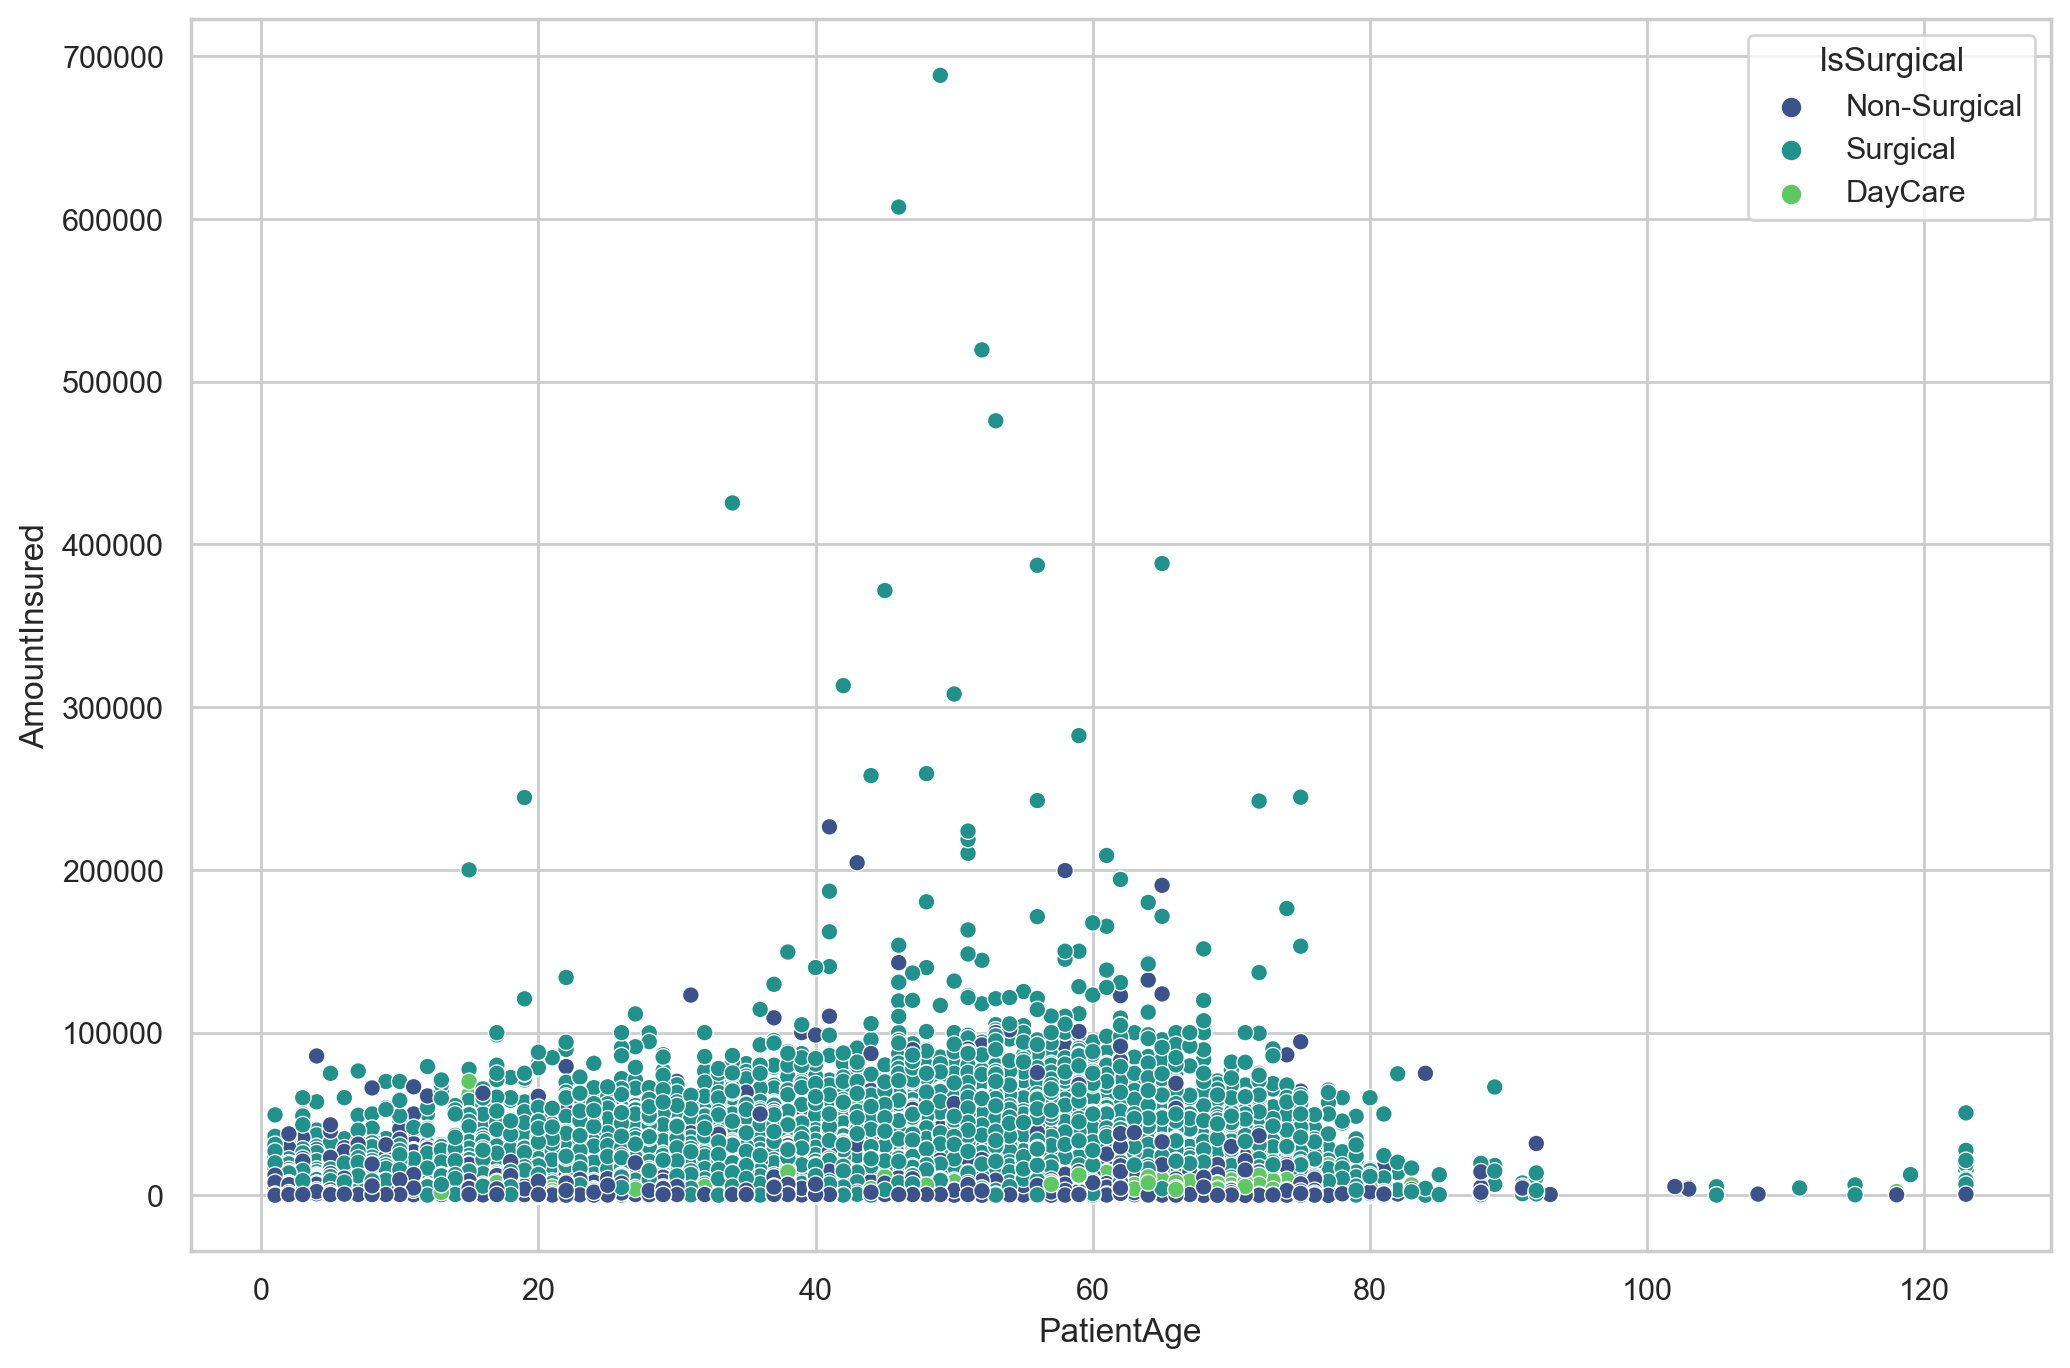

In [130]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='PatientAge', y='AmountInsured', hue='IsSurgical', palette='viridis');

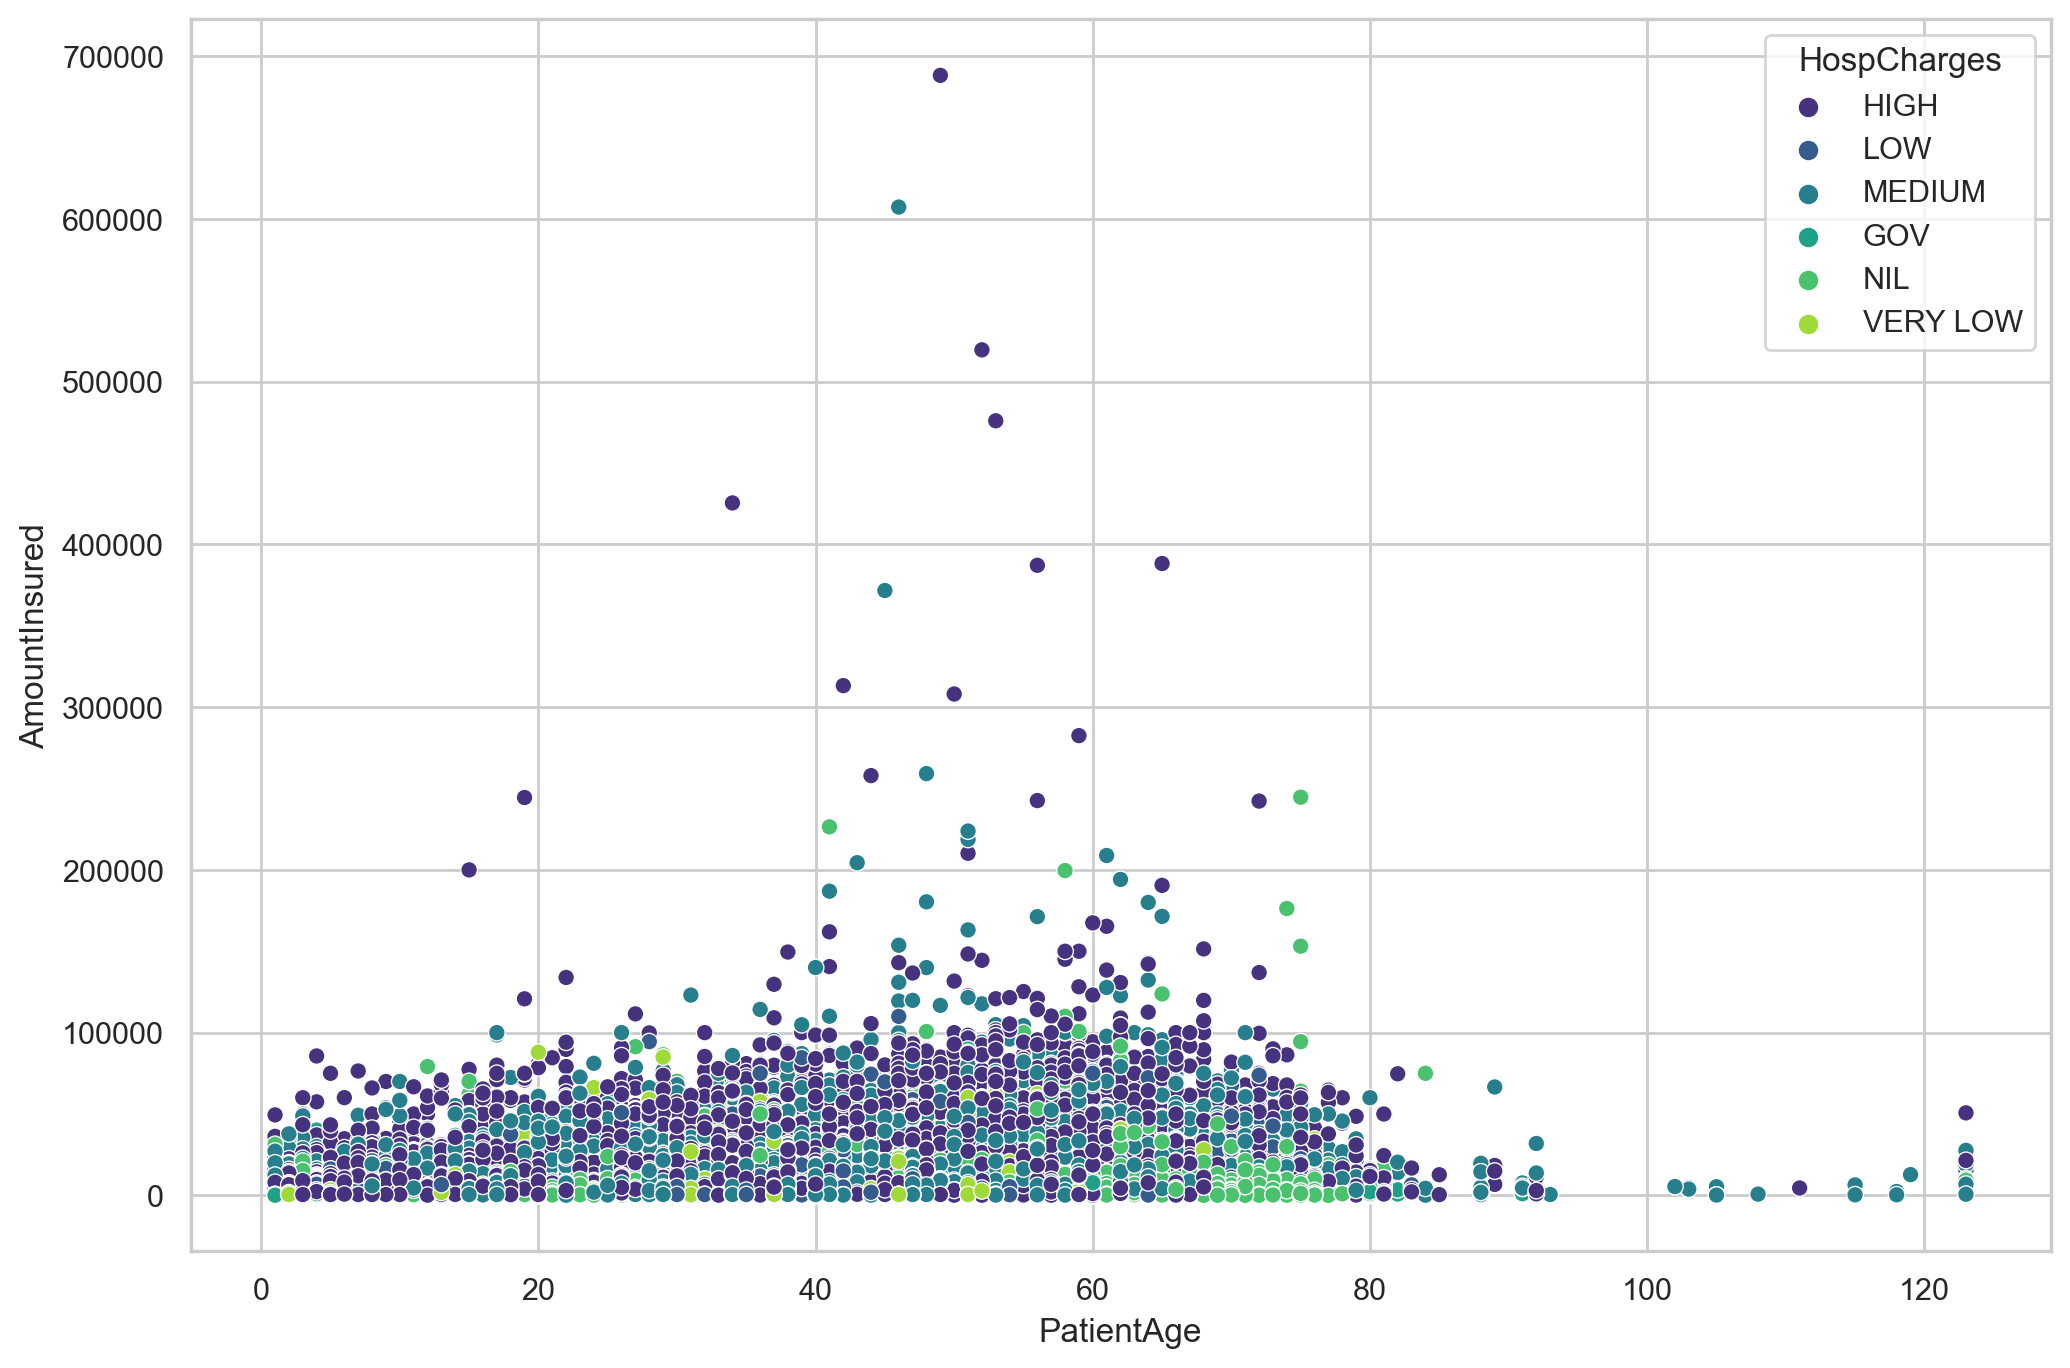

In [131]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='PatientAge', y='AmountInsured', hue='HospCharges', palette='viridis');

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

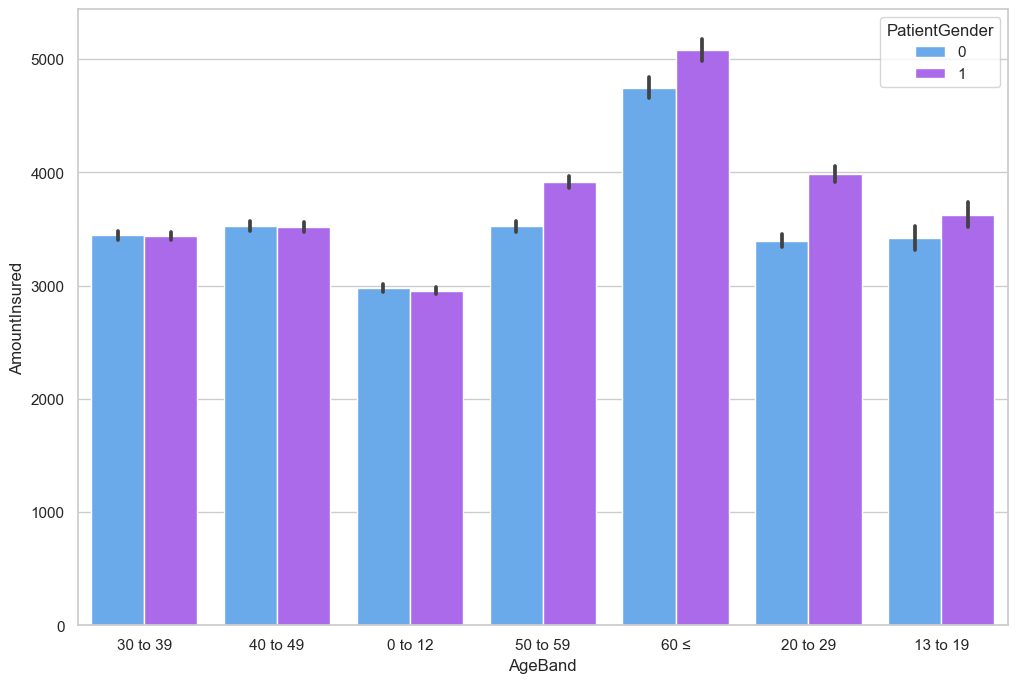

In [66]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='PatientGender',palette='cool')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

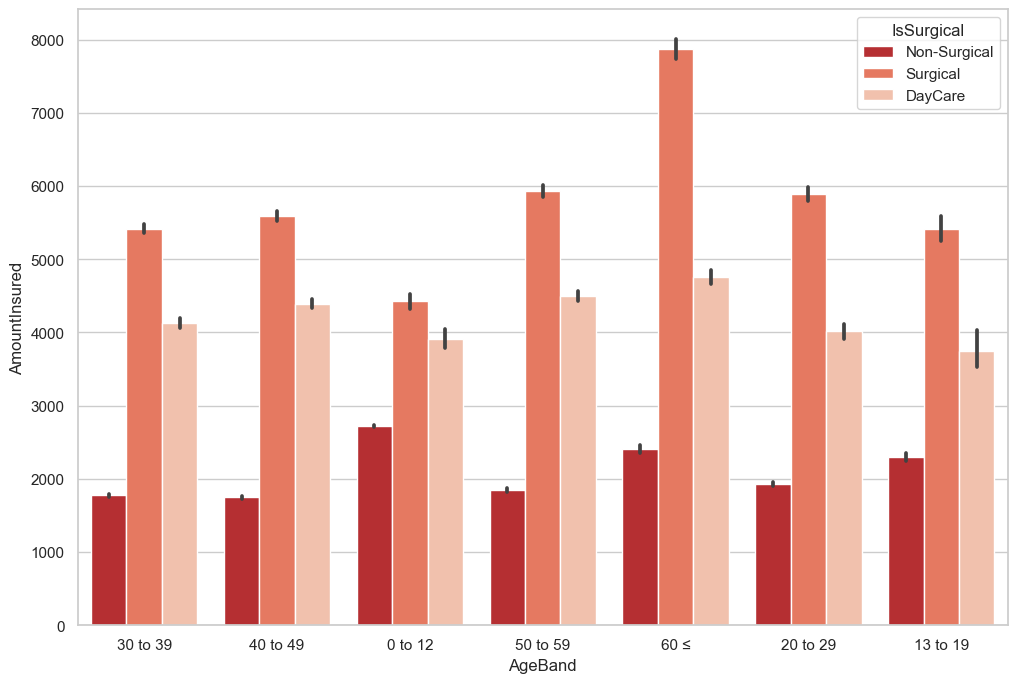

In [133]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsSurgical',palette='Reds_r')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

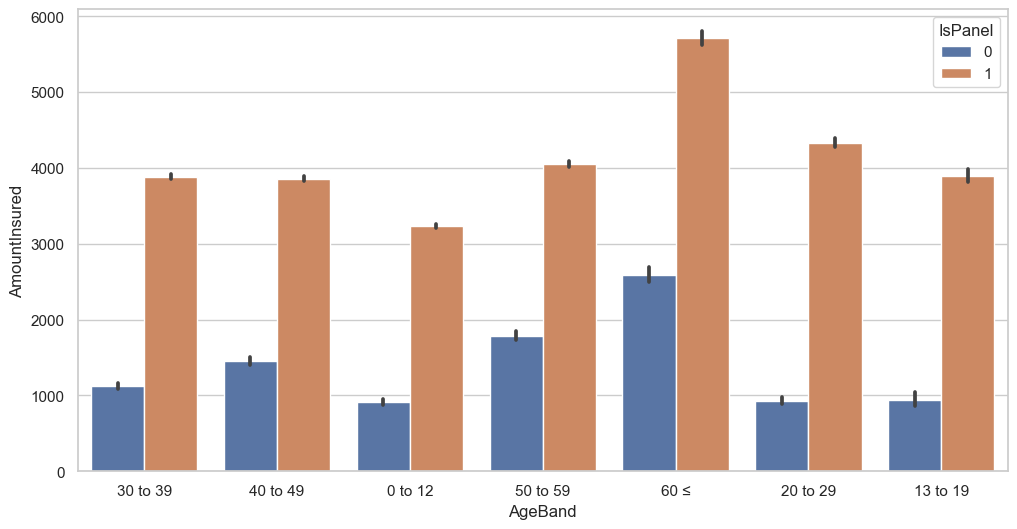

In [134]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsPanel')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

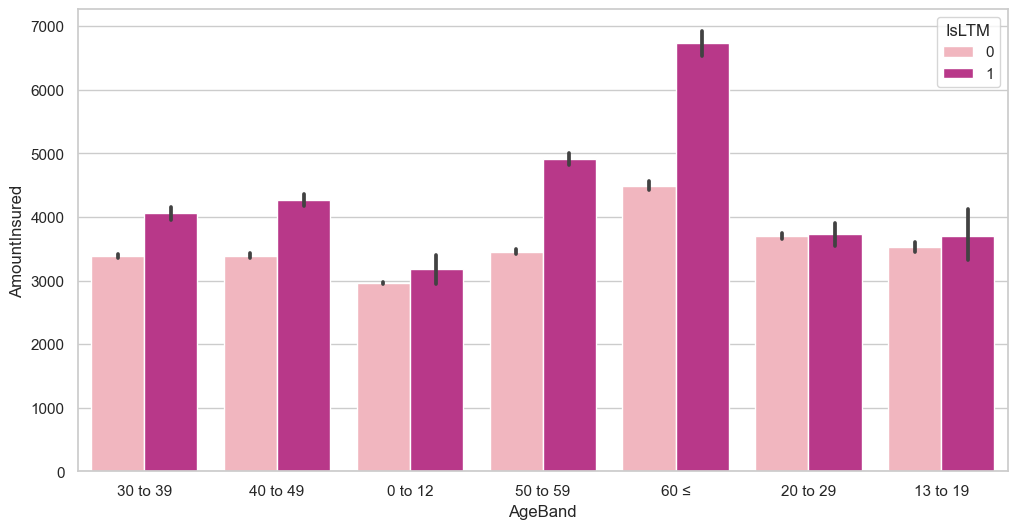

In [135]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsLTM',palette='RdPu')

<Axes: xlabel='TypeOfClaims', ylabel='AmountInsured'>

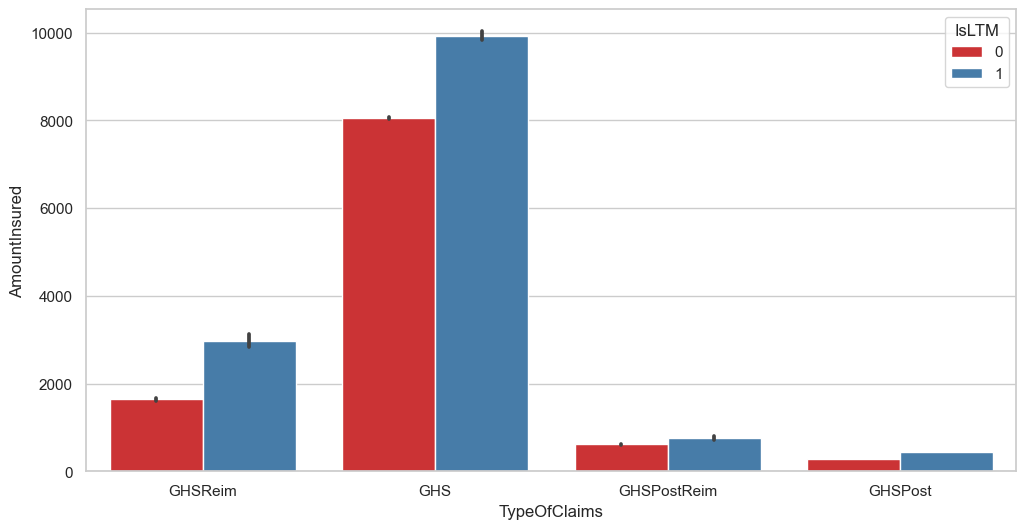

In [136]:
sns.barplot(data=df2, x='TypeOfClaims', y='AmountInsured', hue='IsLTM',palette='Set1')

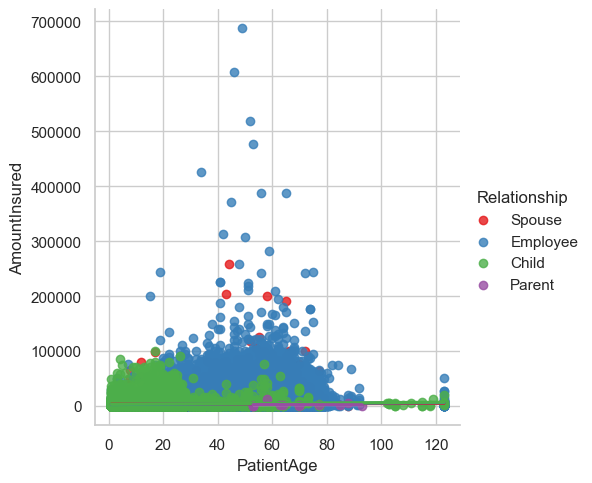

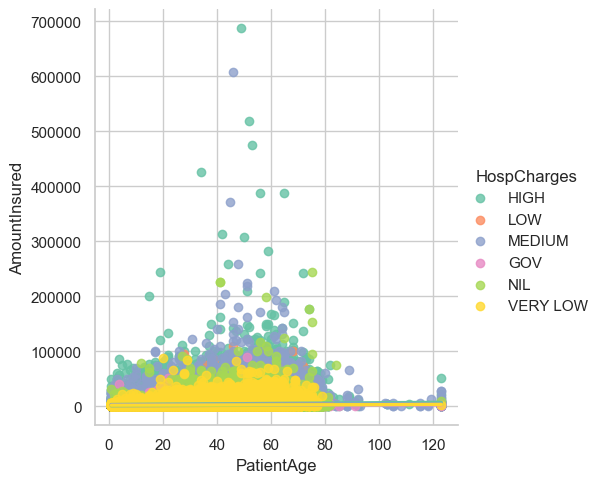

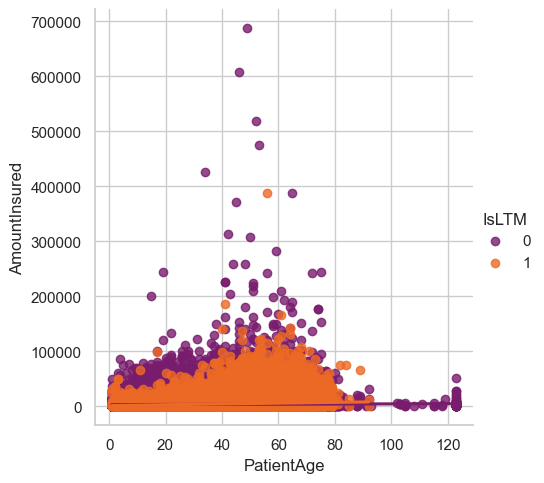

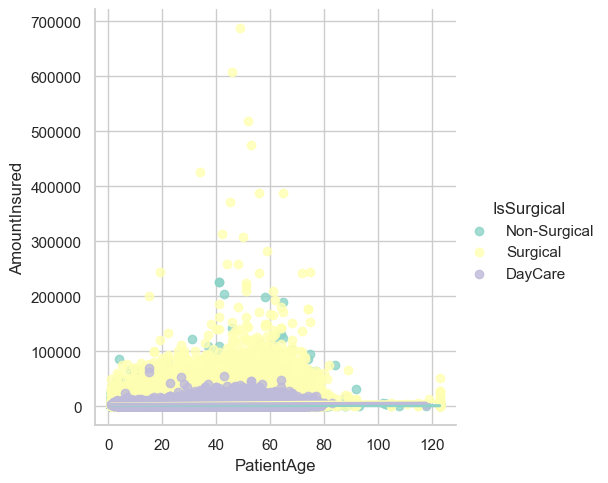

In [137]:
ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='Relationship', palette='Set1')
ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='HospCharges', palette='Set2')
ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='IsLTM', palette='inferno')
ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='IsSurgical', palette='Set3')

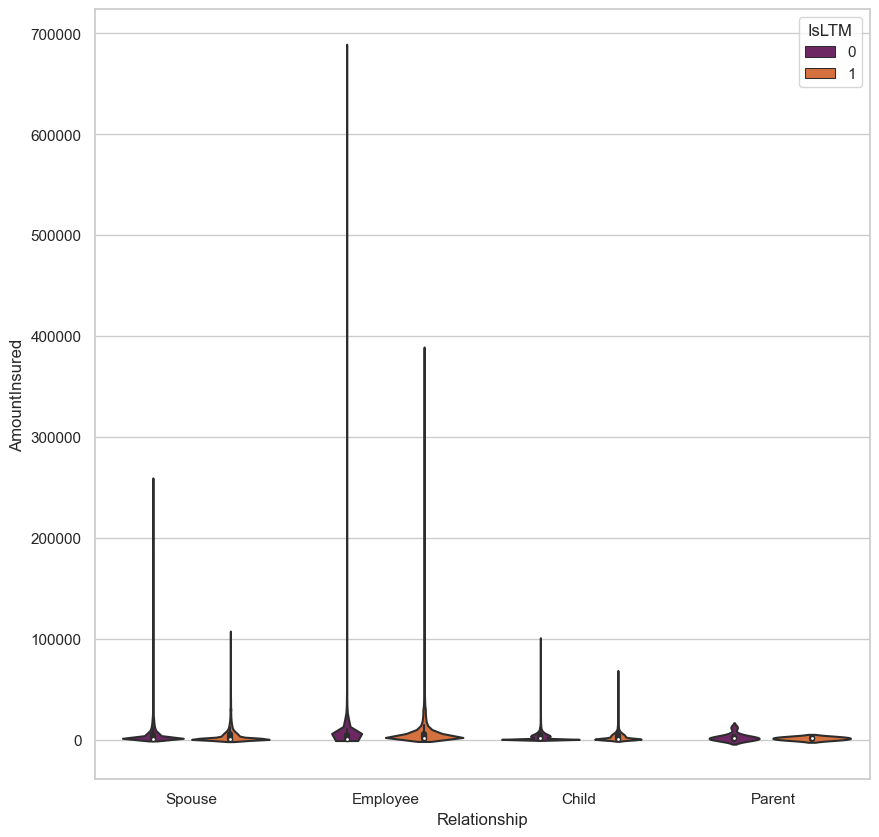

In [138]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'Relationship', y = 'AmountInsured', data=df2,
                 orient='v', hue='IsLTM', palette='inferno')

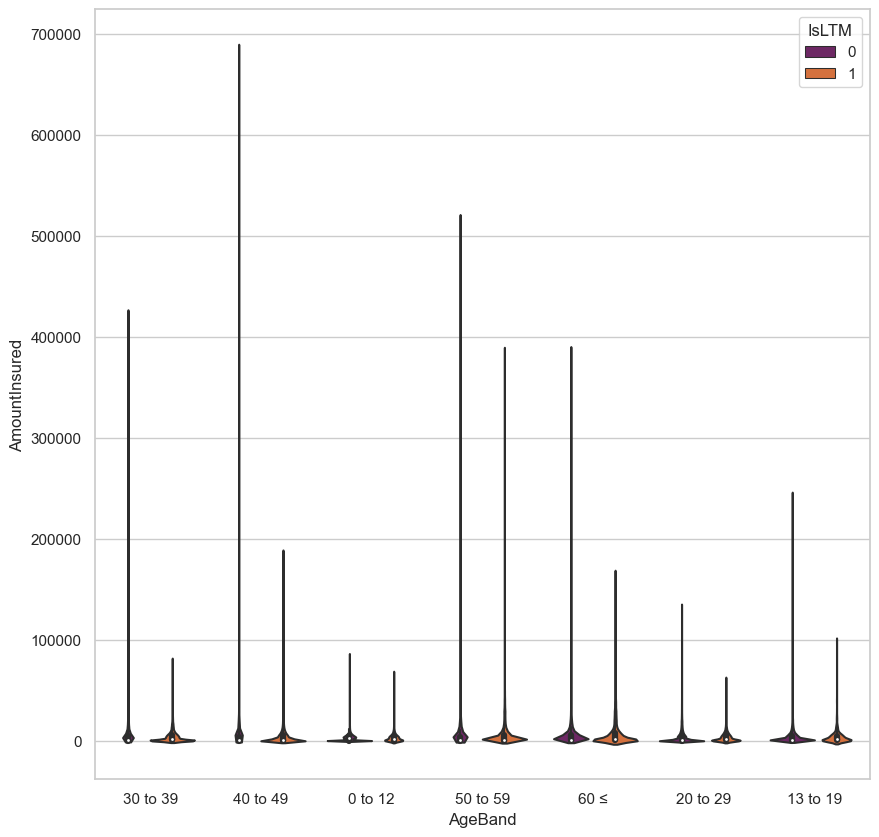

In [139]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'AgeBand', y = 'AmountInsured', data=df2,
                 orient='v', hue='IsLTM', palette='inferno')

### Correlation Checking

In [233]:
df2.corr()

MCDays  AmountIncurred  AmountInsured  ExcessPaid  \
MCDays              1.000000        0.060071       0.068783    0.020887   
AmountIncurred      0.060071        1.000000       0.709262    0.753853   
AmountInsured       0.068783        0.709262       1.000000    0.071499   
ExcessPaid          0.020887        0.753853       0.071499    1.000000   
TotalVisit          0.000580        0.326269       0.466730    0.026629   
IsLTM              -0.004702        0.045376       0.060497    0.007817   
IsMultipleDiag      0.001846        0.007728       0.009503    0.002077   
PatientAge         -0.008256        0.041360       0.050686    0.011279   
IsPanel            -0.024730        0.085589       0.132409   -0.002311   
c_ClaimNo           0.012279       -0.065840      -0.095167   -0.004458   
c_TypeOfClaims      0.029459       -0.249013      -0.366542   -0.010699   
c_IsSurgical        0.050290        0.139974       0.196825    0.014601   
c_Relationship     -0.010133        0.013272       0.015963    0.003901   
c_AgeBand          -0.008691        0.039367       0.048142    0.010831   
c_PatientGender     0.010271        0.010728       0.013261    0.002819   
c_MedicalProviders -0.002385        0.008543       0.010011    0.002757   
c_DiagnosisGroup    0.002915       -0.039784      -0.053940   -0.006016   
c_HospCharges      -0.006865       -0.066823      -0.096114   -0.004966   
c_ProviderState    -0.026119       -0.008357      -0.011957   -0.000679   
c_IndustryField    -0.007992       -0.010101      -0.014832   -0.000467   
c_Corporate         0.005238        0.007865       0.013402   -0.001362   

                    TotalVisit     IsLTM  IsMultipleDiag  PatientAge  \
MCDays                0.000580 -0.004702        0.001846   -0.008256   
AmountIncurred        0.326269  0.045376        0.007728    0.041360   
AmountInsured         0.466730  0.060497        0.009503    0.050686   
ExcessPaid            0.026629  0.007817        0.002077    0.011279   
TotalVisit            1.000000 -0.002784       -0.002851   -0.086008   
IsLTM                -0.002784  1.000000        0.007705    0.184628   
IsMultipleDiag       -0.002851  0.007705        1.000000    0.008148   
PatientAge           -0.086008  0.184628        0.008148    1.000000   
IsPanel              -0.207264  0.039347        0.003298   -0.043650   
c_ClaimNo            -0.028233 -0.035543        0.000126   -0.018372   
c_TypeOfClaims       -0.211855 -0.048409       -0.007096    0.084910   
c_IsSurgical         -0.147940 -0.014970        0.012382    0.076998   
c_Relationship       -0.067789  0.107231       -0.001213    0.457811   
c_AgeBand            -0.090820  0.183922        0.008520    0.983176   
c_PatientGender      -0.027548 -0.015672        0.003165    0.002503   
c_MedicalProviders    0.066031  0.013251        0.004292    0.044572   
c_DiagnosisGroup     -0.027858 -0.163543       -0.005304    0.041680   
c_HospCharges         0.047093 -0.071155       -0.001889   -0.002292   
c_ProviderState      -0.095163  0.021474        0.001367   -0.015806   
c_IndustryField      -0.021521 -0.014097       -0.001127   -0.026906   
c_Corporate           0.125098 -0.030027       -0.011492   -0.006313   

                     IsPanel  c_ClaimNo  ...  c_IsSurgical  c_Relationship  \
MCDays             -0.024730   0.012279  ...      0.050290       -0.010133   
AmountIncurred      0.085589  -0.065840  ...      0.139974        0.013272   
AmountInsured       0.132409  -0.095167  ...      0.196825        0.015963   
ExcessPaid         -0.002311  -0.004458  ...      0.014601        0.003901   
TotalVisit         -0.207264  -0.028233  ...     -0.147940       -0.067789   
IsLTM               0.039347  -0.035543  ...     -0.014970        0.107231   
IsMultipleDiag      0.003298   0.000126  ...      0.012382       -0.001213   
PatientAge         -0.043650  -0.018372  ...      0.076998        0.457811   
IsPanel             1.000000  -0.151620  ...      0.161658        0.012605   
c_Clai

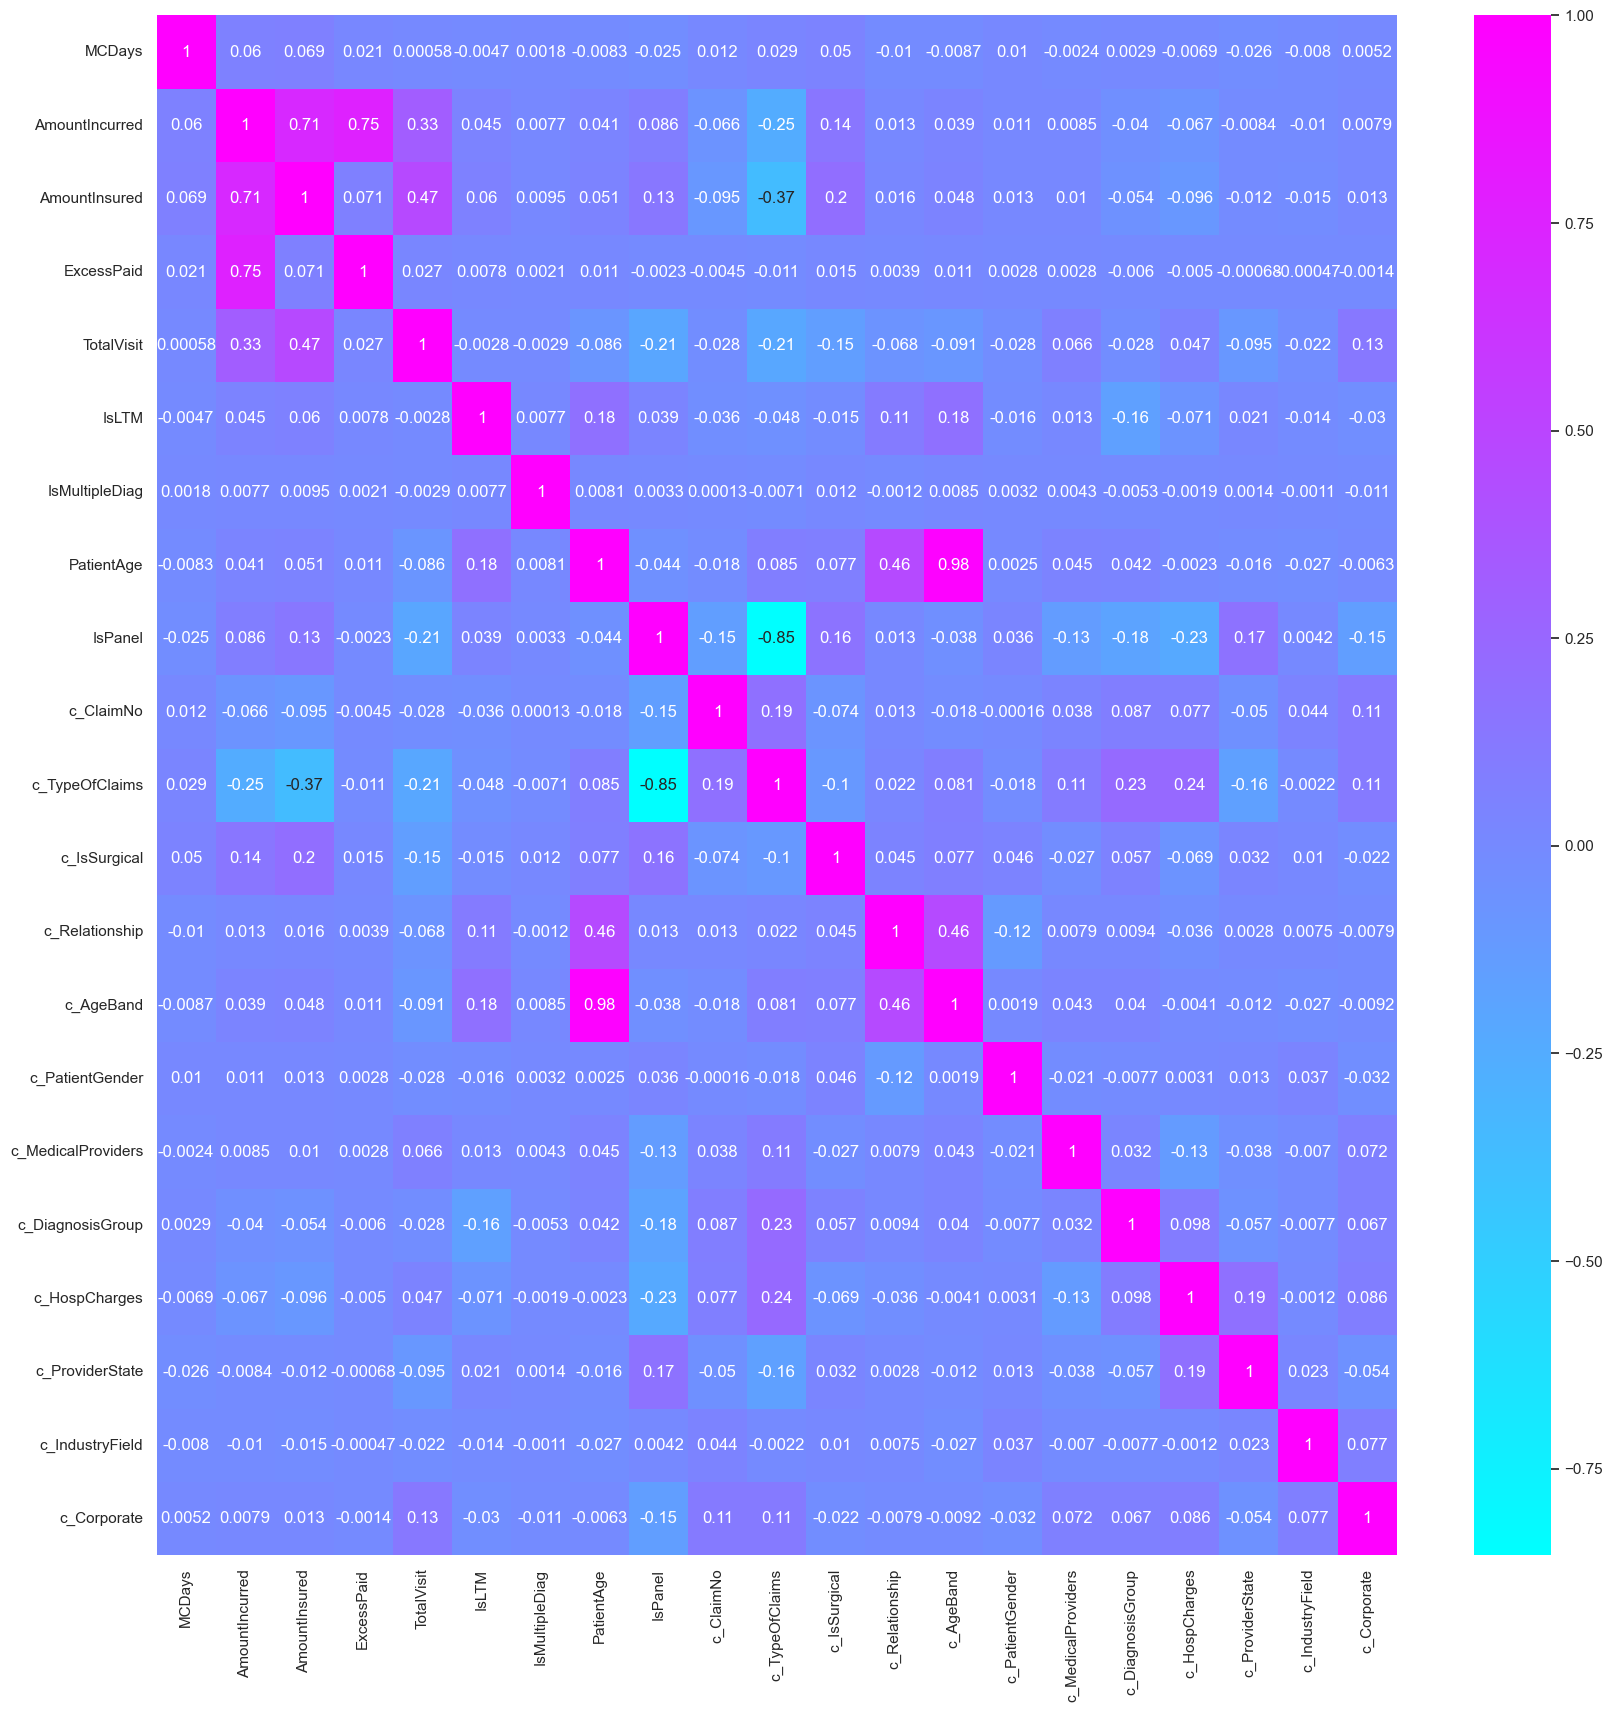

In [232]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(df2.corr(), annot=True, cmap='cool')

### Features Selection - Features Importance

In [142]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define dataset
x = df2.drop(columns = ['AmountInsured'])
y = df2['AmountInsured']

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ValueError: could not convert string to float: 'HESSCIP09190002'

In [ ]:
X = df2['AmountIncurred','MCDays','ExcessPaid','TotalVisit','IsSurgical','IsLTM','IsMultipleDiag','PatientAge', 'Relationship']
Y = df2['AmountInsured']

KeyError: ignored

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

ValueError: ignored

In [ ]:
imp = model.feature_importances_  # 0 to 1 Probablity
imp

In [ ]:
for I,v in enumerate(imp):
    print('Feature: %0d, Score: %.2f' % (I,v))

In [ ]:
%matplotlib inline
plt.bar([x for x in range(len(imp))],imp)
plt.show()

# DATA MODELING

In [70]:
#df3 = pd.get_dummies(df2, columns=['Status','TypeofClaims','PatientGender', 'HospCharges', 'IndustryField','ProviderState'])

#columns (Default: None): Defining which columns from your DataFrame you’d like to get dummies for. 
#By default its every column of object or category type (no ints, floats, etc.)

df3 = pd.get_dummies(df2, columns=None)
df3.head(10)

MemoryError: Unable to allocate 612. GiB for an array with shape (810681, 810681) and data type uint8

## 1. Multivariate Modeling

In [ ]:
#df2['Year'] = df2['Date'].dt.year 

ClaimNo       Date DischargeDate  MCDays  AmountIncurred  \
0  HESSCIP09190002 2019-06-26    2019-06-28     2.0          6626.9   
1  HESSCIP10190003 2019-06-30    2019-01-07     1.0          3641.0   
2  HESSCIP10190004 2019-06-26    2019-06-28     2.0           949.0   

   AmountInsured  ExcessPaid     Status TypeOfClaims  TotalVisit  ...  \
0         5000.0      1626.9  PROCESSED      GHSReim           1  ...   
1         3641.0         0.0  PROCESSED      GHSReim           1  ...   
2          949.0         0.0  PROCESSED      GHSReim           1  ...   

                                           Diagnosis  \
0                                Outcome of delivery   
1                                Outcome of delivery   
2  Other specified conditions of integument speci...   

                                      DiagnosisGroup  HospCharges  \
0  Factors influencing health status and contact ...         HIGH   
1  Factors influencing health status and contact ...         HIGH   
2  Certain conditions originating in the perinata...         HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   
2  KHAMSIAH BINTI MUDA   P83.8      SELANGOR       0   

                   IndustryField  Corporate  Year  
0  Manufacturing Factory/Company       2240  2019  
1  Manufacturing Factory/Company       2240  2019  
2  Manufacturing Factory/Company       2240  2019  

[3 rows x 32 columns]

In [67]:
x = df2['Date']
y = df2['AmountInsured']

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=['2019-06-26T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-06-26T00:00:00.000000000' ... '2022-11-24T00:00:00.000000000'
 '2022-11-24T00:00:00.000000000' '2022-11-29T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(90)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))